In [98]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [99]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [100]:
pd.set_option('max_columns', 82)
pd.set_option('max_rows', 100)

pd.get_option('max_columns')
pd.options.display.max_columns

82

In [101]:
pd.get_option('max_rows')
pd.options.display.max_rows

100

# EDA: Exploratory Data Analysis
first look at the data

In [102]:
raw = pd.read_csv(os.path.join('house-prices', 'house-prices.csv'))

My strategy will consist of the following steps:
1. clean the data (w.r.t. errors, inconsistencies and extreme/unrealistic values, missing values and duplicates)
2. split the data in two (validation and training set), trying different combinations. The test set is already subtracted from the data
3. Remove outliers from the training set
4. Feature encoding to both
5. Feature engineering
6. Model fitting (Regularization and Grid search)


In [103]:
raw.shape

(2430, 82)

In [104]:
raw.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4   NaN       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0

In [105]:
raw.sample(20)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1176   1259  535380140           50        RL          60.0     10836   Pave   
941    2829  908188110          160        RM          24.0      2522   Pave   
229    2287  923228200          180        RM           NaN      1533   Pave   
1783   1927  535180030           20        RL          72.0     10152   Pave   
1848   1939  535327160           20        RL          70.0      8400   Pave   
2350   2037  903457040           50        RM          60.0     10320   Pave   
776    2752  906380150           20        RL          64.0      7488   Pave   
736    1398  905300020           80        RL           NaN     10200   Pave   
2330   1955  535403030           20        RL          66.0      8300   Pave   
781    2889  914476050           90        RL          78.0     10530   Pave   
324    1930  535300040           20        RL          75.0     10050   Pave   
2198   1824  532376090           20        RL          40.0     13673   Pave   
48     1260  535383100          190        RL          60.0     10800   Pave   
2255   1142  531382120           20        RL          65.0      8125   Pave   
2214   2811  907410110           20        RL          84.0     10084   Pave   
1112    171  902104060           50        RM          55.0      8800   Pave   
2299    873  907280170           20        RL          70.0      8750   Pave   
1238   1320  902401010           50        RM           NaN      5700   Pave   
1548   1843  533213130          160        FV          24.0      2280   Pave   
19     1868  534128090           20        RL         108.0     11358   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1176  Grvl       Reg          Lvl    AllPub     Inside        Gtl   
941    NaN       Reg          Lvl    AllPub     Inside        Gtl   
229    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1783   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1848   NaN       Reg          Lvl    AllPub     Corner        Gtl   
2350  Grvl       Reg          Lvl    AllPub     Inside        Gtl   
776    NaN       IR1          Lvl    AllPub     Inside        Gtl   
736    NaN       Reg          Lvl    AllPub     Inside        Gtl   
2330   NaN       IR1          Lvl    AllPub     Inside        Gtl   
781    NaN       Reg          Lvl    AllPub     Inside        Gtl   
324    NaN       Reg          Lvl    AllPub     Inside        Gtl   
2198   NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
48    Grvl       Reg          Lvl    AllPub     Inside        Gtl   
2255   NaN       Reg          Lvl    AllPub     Inside        Gtl   
2214   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1112  Grvl       Reg          Lvl    AllPub     Corner        Gtl   
2299   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1238   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1548  Pave       Reg          Lvl    AllPub     Inside        Gtl   
19     NaN       IR1          Lvl    AllPub     Corner        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1176      OldTown        Norm        Norm      1Fam      1.5Fin             5   
941       Edwards        Norm        Norm     Twnhs      2Story             7   
229       MeadowV        Norm        Norm     Twnhs        SLvl             4   
1783        NAmes        Norm        Norm      1Fam      1Story             5   
1848        NAmes        Norm        Norm      1Fam      1Story             5   
2350       IDOTRR        Norm        Norm      1Fam      1.5Fin             6   
776       CollgCr        Norm        Norm      1Fam      1Story             7   
736        Sawyer        Norm        Norm      1Fam        SLvl             5   
2330        NAmes        Norm        Norm      1Fam      1Story             6   
781       Mitchel        Norm        Norm    Duplex      SFoyer  

In [106]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [107]:
raw.describe().T

count          mean           std          min  \
Order            2430.0  1.469478e+03  8.432365e+02          1.0   
PID              2430.0  7.149375e+08  1.887339e+08  526301100.0   
MS SubClass      2430.0  5.709259e+01  4.290325e+01         20.0   
Lot Frontage     2010.0  6.920199e+01  2.348699e+01         21.0   
Lot Area         2430.0  1.024356e+04  8.353925e+03       1470.0   
Overall Qual     2430.0  6.088889e+00  1.414621e+00          1.0   
Overall Cond     2430.0  5.569959e+00  1.116442e+00          1.0   
Year Built       2430.0  1.971167e+03  3.020793e+01       1875.0   
Year Remod/Add   2430.0  1.984239e+03  2.075116e+01       1950.0   
Mas Vnr Area     2410.0  1.019954e+02  1.766117e+02          0.0   
BsmtFin SF 1     2429.0  4.439444e+02  4.574536e+02          0.0   
BsmtFin SF 2     2429.0  5.107369e+01  1.721435e+02          0.0   
Bsmt Unf SF      2429.0  5.564809e+02  4.396501e+02          0.0   
Total Bsmt SF    2429.0  1.051499e+03  4.446900e+02          0.0   
1st Flr SF       2430.0  1.159845e+03  3.930976e+02        334.0   
2nd Flr SF       2430.0  3.266728e+02  4.194908e+02          0.0   
Low Qual Fin SF  2430.0  4.586831e+00  4.721618e+01          0.0   
Gr Liv Area      2430.0  1.491105e+03  4.961783e+02        334.0   
Bsmt Full Bath   2428.0  4.341021e-01  5.279405e-01          0.0   
Bsmt Half Bath   2428.0  6.013180e-02  2.429227e-01          0.0   
Full Bath        2430.0  1.560905e+00  5.483934e-01          0.0   
Half Bath        2430.0  3.695473e-01  5.011910e-01          0.0   
Bedroom AbvGr    2430.0  2.842798e+00  8.176594e-01          0.0   
Kitchen AbvGr    2430.0  1.042798e+00  2.084554e-01          0.0   
TotRms AbvGrd    2430.0  6.409053e+00  1.551557e+00          2.0   
Fireplaces       2430.0  5.950617e-01  6.465988e-01          0.0   
Garage Yr Blt    2292.0  1.977861e+03  2.554487e+01       1896.0   
Garage Cars      2429.0  1.762454e+00  7.582429e-01          0.0   
Garage Area      2429.0  4.719794e+02  2.157535e+02          0.0   
Wood Deck SF     2430.0  9.391770e+01  1.281069e+02          0.0   
Open Porch SF    2430.0  4.709177e+01  6.712385e+01          0.0   
Enclosed Porch   2430.0  2.229465e+01  6.238641e+01          0.0   
3Ssn Porch       2430.0  2.471605e+00  2.488024e+01          0.0   
Screen Porch     2430.0  1.652922e+01  5.682223e+01          0.0   
Pool Area        2430.0  2.401235e+00  3.611199e+01          0.0   
Misc Val         2430.0  5.617984e+01  6.166615e+02          0.0   
Mo Sold          2430.0  6.209465e+00  2.721942e+00          1.0   
Yr Sold          2430.0  2.007784e+03  1.311843e+00       2006.0   
SalePrice        2430.0  1.801997e+05  7.960747e+04      12789.0   

                          25%          50%           75%           max  
Order            7.492500e+02       1470.5  2.193500e+03  2.930000e+03  
PID              5.284770e+08  535454055.0  9.071352e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.482000e+03       9500.0  1.160450e+04  2.152450e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.000000e+03  2.010000e+03  
Year Remod/Add   1.966000e+03       1993.0  2.003000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.647500e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        375.0  7.370000e+02  5.644000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.160000e+02        462.0  7.990000e+02  2.336000e+03  
Total Bsmt SF    7.940000e+02        990.0  1.299000e+03  6.110000e+03  
1st Flr SF       8.805000e+02       1086.0  1.387750e+03  5.095000e+03  
2nd Flr SF       0.000000e+00          0.0  6.980000e+02  2.065000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00

In [108]:
raw.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [109]:
raw['Fireplace Qu'].value_counts()

Gd    620
TA    477
Fa     67
Po     42
Ex     38
Name: Fireplace Qu, dtype: int64

I will define different list for nominal, ordinal, continuous and discrete features and analyse each group separetely.

In [110]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

In [111]:
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

In [112]:
continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

In [113]:
discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

In [114]:
target = ['SalePrice']

In [115]:
identifiers = ['PID', 'Order']

In [116]:
len(continuous)

19

In [117]:
len(ordinal)

23

In [118]:
len(nominal)

23

In [119]:
len(discrete)

14

In [120]:
len(target)

1

In [121]:
len(ordinal) + len(nominal) + len(discrete) + len(continuous) + len(target) + len(identifiers)

82

In [122]:
raw[discrete].head()

Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        2000            2000             0.0             0.0          2   
1        1951            1951             0.0             0.0          1   
2        1970            1970             0.0             0.0          1   
3        1959            1959             0.0             1.0          1   
4        1910            1950             0.0             0.0          1   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          1              4              1              8           1   
1          1              2              1              5           1   
2          1              3              1              6           0   
3          1              4              1              6           1   
4          1              4              2              9           1   

   Garage Yr Blt  Garage Cars  Mo Sold  Yr Sold  
0         2000.0          2.0        4     2009  
1         1951.0          2.0        6     2006  
2         1970.0          1.0        1     2007  
3         1959.0          2.0        4     2010  
4         1960.0          1.0        1     2007

# EDA
## 1. Cleaning the data

### 1| Typos and inconsistencies

In [123]:
raw[discrete].describe().T.round(0)

count    mean   std     min     25%     50%     75%     max
Year Built      2430.0  1971.0  30.0  1875.0  1954.0  1973.0  2000.0  2010.0
Year Remod/Add  2430.0  1984.0  21.0  1950.0  1966.0  1993.0  2003.0  2010.0
Bsmt Full Bath  2428.0     0.0   1.0     0.0     0.0     0.0     1.0     3.0
Bsmt Half Bath  2428.0     0.0   0.0     0.0     0.0     0.0     0.0     2.0
Full Bath       2430.0     2.0   1.0     0.0     1.0     2.0     2.0     4.0
Half Bath       2430.0     0.0   1.0     0.0     0.0     0.0     1.0     2.0
Bedroom AbvGr   2430.0     3.0   1.0     0.0     2.0     3.0     3.0     8.0
Kitchen AbvGr   2430.0     1.0   0.0     0.0     1.0     1.0     1.0     3.0
TotRms AbvGrd   2430.0     6.0   2.0     2.0     5.0     6.0     7.0    15.0
Fireplaces      2430.0     1.0   1.0     0.0     0.0     1.0     1.0     4.0
Garage Yr Blt   2292.0  1978.0  26.0  1896.0  1960.0  1978.0  2002.0  2207.0
Garage Cars     2429.0     2.0   1.0     0.0     1.0     2.0     2.0     4.0
Mo Sold         2430.0     6.0   3.0     1.0     4.0     6.0     8.0    12.0
Yr Sold         2430.0  2008.0   1.0  2006.0  2007.0  2008.0  2009.0  2010.0

In [124]:
raw.loc[raw['Garage Yr Blt'] == 2207, :]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2219   2261  916384070           20        RL          68.0      8298   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
2219   NaN       IR1          HLS    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
2219       Timber        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
2219             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
2219      VinylSd      VinylSd          NaN           NaN         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
2219         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2219         583.0            Unf           0.0        963.0         1546.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
2219    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
2219                0         1564             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
2219          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
2219        Typ           1           Gd      Attchd         2207.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
2219           RFn          2.0        502.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
2219           Y           132              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
2219             0          0     NaN   NaN          NaN         0        9   

      Yr Sold Sale Type Sale Condition  SalePrice  
2219     2007       New        Partial     267300

This record refers to a new house built on 2007 so probably this typo refers to the same year the house was sold, since it is new.

In [125]:
raw.loc[raw['Garage Yr Blt'] == 2207, 'Garage Yr Blt'] = 2007

In [126]:
raw[continuous].describe(percentiles = [0.1, 0.25, 0.50, 0.75, 0.90]).T

count          mean          std     min     10%     25%  \
Lot Frontage     2010.0     69.201990    23.486988    21.0    43.0    58.0   
Lot Area         2430.0  10243.557613  8353.925254  1470.0  4897.3  7482.0   
Mas Vnr Area     2410.0    101.995436   176.611699     0.0     0.0     0.0   
BsmtFin SF 1     2429.0    443.944422   457.453649     0.0     0.0     0.0   
BsmtFin SF 2     2429.0     51.073693   172.143522     0.0     0.0     0.0   
Bsmt Unf SF      2429.0    556.480856   439.650118     0.0    46.0   216.0   
Total Bsmt SF    2429.0   1051.498971   444.690012     0.0   600.0   794.0   
1st Flr SF       2430.0   1159.845267   393.097610   334.0   747.0   880.5   
2nd Flr SF       2430.0    326.672840   419.490754     0.0     0.0     0.0   
Low Qual Fin SF  2430.0      4.586831    47.216176     0.0     0.0     0.0   
Gr Liv Area      2430.0   1491.104938   496.178280   334.0   924.0  1120.0   
Garage Area      2429.0    471.979415   215.753523     0.0   240.0   324.0   
Wood Deck SF     2430.0     93.917695   128.106940     0.0     0.0     0.0   
Open Porch SF    2430.0     47.091770    67.123846     0.0     0.0     0.0   
Enclosed Porch   2430.0     22.294650    62.386414     0.0     0.0     0.0   
3Ssn Porch       2430.0      2.471605    24.880245     0.0     0.0     0.0   
Screen Porch     2430.0     16.529218    56.822227     0.0     0.0     0.0   
Pool Area        2430.0      2.401235    36.111988     0.0     0.0     0.0   
Misc Val         2430.0     56.179835   616.661541     0.0     0.0     0.0   

                    50%       75%      90%       max  
Lot Frontage       68.0     80.00     95.0     313.0  
Lot Area         9500.0  11604.50  14365.1  215245.0  
Mas Vnr Area        0.0    164.75    323.1    1600.0  
BsmtFin SF 1      375.0    737.00   1053.6    5644.0  
BsmtFin SF 2        0.0      0.00    136.4    1526.0  
Bsmt Unf SF       462.0    799.00   1200.6    2336.0  
Total Bsmt SF     990.0   1299.00   1612.4    6110.0  
1st Flr SF       1086.0   1387.75   1675.0    5095.0  
2nd Flr SF          0.0    698.00    912.0    2065.0  
Low Qual Fin SF     0.0      0.00      0.0    1064.0  
Gr Liv Area      1440.0   1740.00   2127.0    5642.0  
Garage Area       478.0    576.00    757.2    1488.0  
Wood Deck SF        0.0    168.00    256.1    1424.0  
Open Porch SF      27.0     70.00    130.0     742.0  
Enclosed Porch      0.0      0.00    112.0    1012.0  
3Ssn Porch          0.0      0.00      0.0     508.0  
Screen Porch        0.0      0.00      0.0     490.0  
Pool Area           0.0      0.00      0.0     800.0  
Misc Val            0.0      0.00      0.0   17000.0

I observe some extreme values which will be treated later when I handle the outliers.

### 2| Duplicates

I check for duplicate rows:

In [127]:
raw.duplicated(keep = 'first').sum()

0

I check specifically for the columns 'Order' and  'PID' because they are identifiers.

In [128]:
raw.duplicated(['Order']).sum()

0

In [129]:
raw.duplicated(['PID']).sum()

0

### 3| Data Types

In [130]:
raw.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

'MS SubClass' is a categorical feature (nominal) encoded with numerical values with a data type as int64. It has to be changed to string.

In [131]:
raw['MS SubClass'].isna().sum()

0

In [132]:
raw['MS SubClass'] = raw['MS SubClass'].astype('category')

In [133]:
raw['MS SubClass'].dtypes

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                  180, 190],
                 ordered=False)

In [134]:
raw.dtypes

Order                 int64
PID                   int64
MS SubClass        category
MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Alley                object
Lot Shape            object
Land Contour         object
Utilities            object
Lot Config           object
Land Slope           object
Neighborhood         object
Condition 1          object
Condition 2          object
Bldg Type            object
House Style          object
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remod/Add        int64
Roof Style           object
Roof Matl            object
Exterior 1st         object
Exterior 2nd         object
Mas Vnr Type         object
Mas Vnr Area        float64
Exter Qual           object
Exter Cond           object
Foundation           object
Bsmt Qual            object
Bsmt Cond            object
Bsmt Exposure        object
BsmtFin Type 1       object
BsmtFin SF 1        

For the rest of the categorical features I have to handle the missing values first.

### 3| Missing values

In [135]:
raw[continuous].isnull().sum()

Lot Frontage       420
Lot Area             0
Mas Vnr Area        20
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
dtype: int64

In [136]:
raw[discrete].isnull().sum()

Year Built          0
Year Remod/Add      0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     138
Garage Cars         1
Mo Sold             0
Yr Sold             0
dtype: int64

In [137]:
raw[ordinal].isnull().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual           71
Bsmt Cond           71
Bsmt Exposure       74
BsmtFin Type 1      71
BsmtFin Type 2      72
Heating QC           0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1186
Garage Finish      138
Garage Qual        138
Garage Cond        138
Paved Drive          0
Pool QC           2418
Fence             1941
dtype: int64

In [138]:
raw[nominal].isnull().sum()

MS SubClass          0
MS Zoning            0
Street               0
Alley             2267
Land Contour         0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        20
Foundation           0
Heating              0
Central Air          0
Garage Type        136
Misc Feature      2340
Sale Type            0
Sale Condition       0
dtype: int64

In [139]:
(raw.isnull().mean().round(3)*100).sort_values(ascending = True)

Order               0.0
Bsmt Unf SF         0.0
Total Bsmt SF       0.0
Sale Condition      0.0
Heating QC          0.0
Central Air         0.0
Electrical          0.0
1st Flr SF          0.0
2nd Flr SF          0.0
Low Qual Fin SF     0.0
Gr Liv Area         0.0
Full Bath           0.0
Half Bath           0.0
Bedroom AbvGr       0.0
Kitchen AbvGr       0.0
Kitchen Qual        0.0
TotRms AbvGrd       0.0
Functional          0.0
Sale Type           0.0
Yr Sold             0.0
Mo Sold             0.0
Misc Val            0.0
Pool Area           0.0
Screen Porch        0.0
BsmtFin SF 2        0.0
3Ssn Porch          0.0
Open Porch SF       0.0
Wood Deck SF        0.0
Paved Drive         0.0
Garage Area         0.0
Garage Cars         0.0
Fireplaces          0.0
Enclosed Porch      0.0
BsmtFin SF 1        0.0
Heating             0.0
SalePrice           0.0
Lot Config          0.0
Lot Shape           0.0
Street              0.0
Land Slope          0.0
Neighborhood        0.0
Lot Area        

I decide to drop the columns ['Fence', 'Alley', 'Misc Feature', 'Pool QC'] because they have more than 79% of missing values.

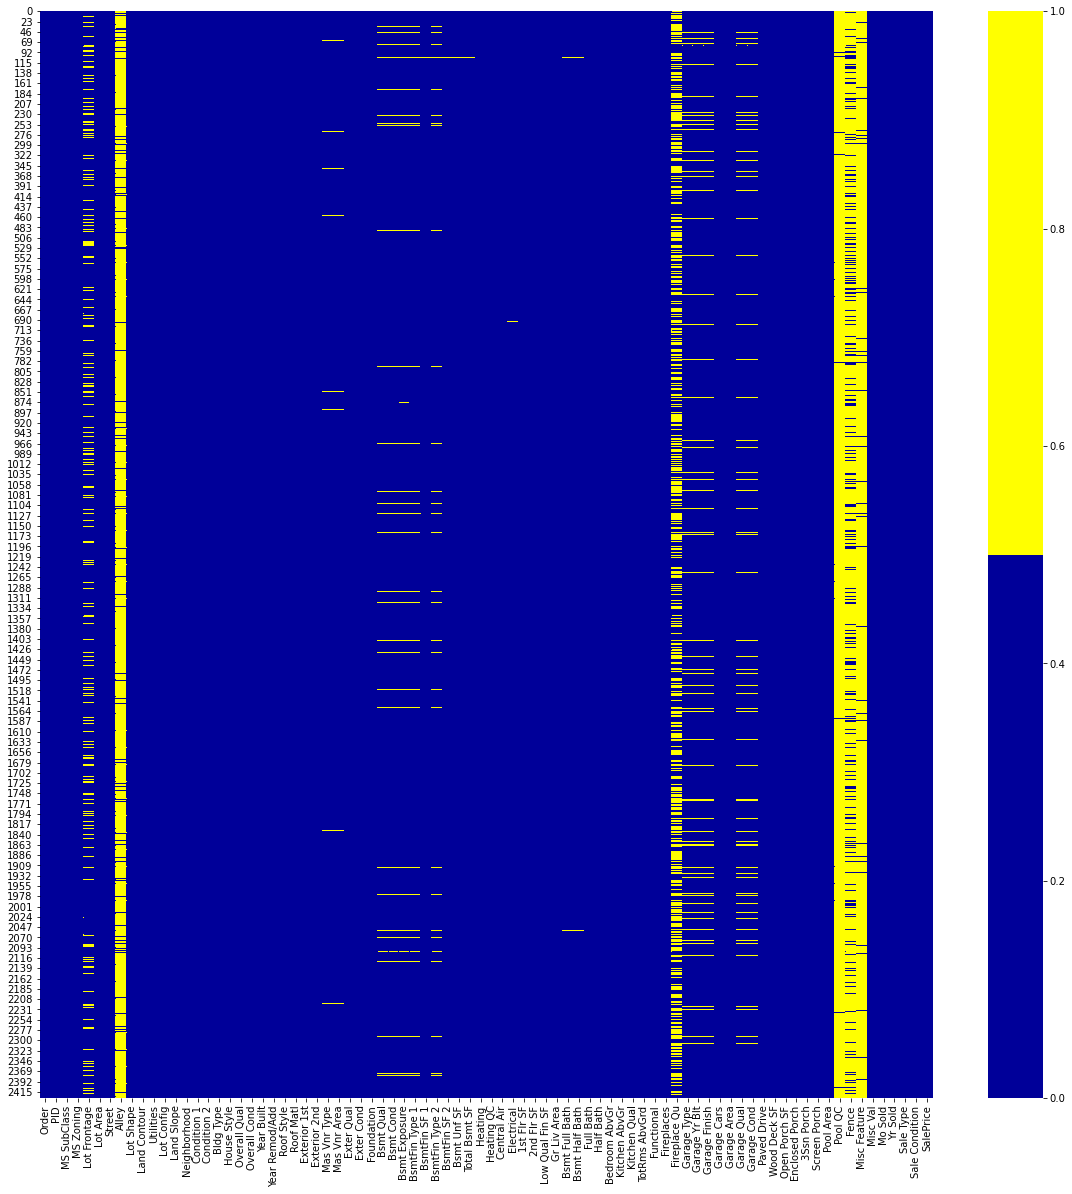

In [140]:
colors = ['#000099', '#ffff00']
# yellow for the missing values, blue for the nonmissing

fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(raw.isnull(), cmap = sns.color_palette(colors))
# yellow for the missing values, blue for the nonmissingg, ax = plt.subplots(figsize=(20,20)) 


I decide to drop the columns ['Fence', 'Alley', 'Misc Feature', 'Pool QC'] because they have more than 79% of missing values. I will also drop the column 'Fireplace Qu'  because it has about 50% missimg values and out of intuition the quality of the fireplace cannot be that determining for the total house price.

In [141]:
raw.drop( columns =  ['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis = 1, inplace = True)

In [142]:
raw.shape

(2430, 78)

In [143]:
raw[raw[['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().any(axis = 1)]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
104    1342  903230120          20        RM          99.0      5940   Pave   
1565   2237  910201180          70        RM          50.0      9060   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
104        IR1          Lvl    AllPub        FR3        Gtl      BrkSide   
1565       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
104        Feedr        Norm      1Fam      1Story             4   
1565        Norm        Norm      1Fam      2Story             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
104              7        1946            1950      Gable   CompShg   
1565             6        1923            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
104       MetalSd       CBlock         None           0.0         TA   
1565      Wd Sdng      Plywood         None           0.0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
104          TA      PConc       NaN       NaN           NaN            NaN   
1565         TA     BrkTil        Gd        TA            No            ALQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
104            NaN            NaN           NaN          NaN            NaN   
1565         548.0            Unf           0.0        311.0          859.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
104     GasA         TA           Y      FuseA         896           0   
1565    GasA         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
104                 0          896             NaN             NaN          1   
1565                0         1828             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
104           0              2              1           TA              4   
1565          0              3              1           Gd              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
104         Typ           0          NaN      Detchd         1946.0   
1565        Typ           0          NaN      Detchd            NaN   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
104            Unf          1.0        280.0          TA          TA   
1565           NaN          NaN          NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
104            Y             0              0               0           0   
1565           Y           174              0             212           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
104              0          0         0        4     2008     ConLD   
1565             0          0         0        3     2007       WD    

     Sale Condition  SalePrice  
104         Abnorml      79000  
1565         Alloca     150909

  I observe that the variable with order id 1342 has missing values on the features 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF' therefore I will fill them with 0. The thinking behind this decision is that there is no data about the Basement so I treat it as if there is no Basement at all.m

In [144]:
raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']] = raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].fillna(0)

In [145]:
raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isna().sum()

BsmtFin SF 1     0
BsmtFin SF 2     0
Bsmt Unf SF      0
Total Bsmt SF    0
dtype: int64

In [146]:
raw[raw[['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().any(axis = 1)]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1565   2237  910201180          70        RM          50.0      9060   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1565       Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1565        Norm        Norm      1Fam      2Story             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1565             6        1923            1999      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1565      Wd Sdng      Plywood         None           0.0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1565         TA     BrkTil        Gd        TA            No            ALQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1565         548.0            Unf           0.0        311.0          859.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1565    GasA         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1565                0         1828             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1565          0              3              1           Gd              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1565        Typ           0          NaN      Detchd            NaN   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1565           NaN          NaN          NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1565           Y           174              0             212           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
1565             0          0         0        3     2007       WD    

     Sale Condition  SalePrice  
1565         Alloca     150909

In [147]:
raw.isnull().sum() 

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        420
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         20
Mas Vnr Area         20
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            71
Bsmt Cond            71
Bsmt Exposure        74
BsmtFin Type 1       71
BsmtFin SF 1          0
BsmtFin Type 2       72
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air     

In [148]:
raw[raw['Lot Frontage'].isnull()]

Order         PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0       484   528275070          60        RL           NaN      8795   Pave   
13      785   905377130          30        RL           NaN     12342   Pave   
26      583   534128010          60        RL           NaN     10382   Pave   
34     1611  1007100110          70   I (all)           NaN     56600   Pave   
35     2893   916252170         120        RM           NaN      8239   Pave   
...     ...         ...         ...       ...           ...       ...    ...   
2399   2899   916460070          20        RL           NaN      8098   Pave   
2409   2894   916325040          20        RL           NaN     50102   Pave   
2412   2898   916403130          60        RL           NaN     11170   Pave   
2413   2223   909428120          20        RL           NaN     21000   Pave   
2420   1829   532477040          60        RL           NaN     17542   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0          IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
13         IR1          Lvl    AllPub     Inside        Gtl      Edwards   
26         IR1          Lvl    AllPub     Corner        Gtl       NWAmes   
34         IR1          Low    AllPub     Inside        Gtl       IDOTRR   
35         IR1          Lvl    AllPub     Inside        Gtl      GrnHill   
...        ...          ...       ...        ...        ...          ...   
2399       IR1          Lvl    AllPub     Inside        Gtl       Timber   
2409       IR1          Low    AllPub     Inside        Mod       Timber   
2412       IR2          Lvl    AllPub     Corner        Gtl       Timber   
2413       Reg          Bnk    AllPub     Corner        Gtl      Crawfor   
2420       IR1          Lvl    AllPub     Inside        Gtl      Veenker   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0           Norm        Norm      1Fam      2Story             7   
13          Norm        Norm      1Fam      1Story             4   
26          PosN        Norm      1Fam      2Story             7   
34          Norm        Norm      1Fam      2.5Unf             5   
35          Norm        Norm    TwnhsE      1Story             7   
...          ...         ...       ...         ...           ...   
2399        Norm        Norm      1Fam      1Story             6   
2409        Norm        Norm      1Fam      1Story             6   
2412        Norm        Norm      1Fam      2Story             7   
2413        Norm        Norm      1Fam      1Story             6   
2420        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                5        2000            2000      Gable   CompShg   
13               5        1940            1950      Gable   CompShg   
26               6        1973            1973      Gable   CompShg   
34               1        1900            1950        Hip   CompShg   
35               5        1986            1986      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2399             5        2000            2000      Gable   CompShg   
2409             5        1958            1958      Gable   Tar&Grv   
2412             5        1990            1991      Gable   CompShg   
2413             5        1953            1953        Hip   CompShg   
2420             7        1974            2003      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         VinylSd      VinylSd         None           0.0         Gd   
13        VinylSd      VinylSd         None           0.0         TA   
26        HdBoard      HdBoard        Stone         240.0         TA   
34        Wd Sdng      Wd Sdng         None           0.0         TA   
35        BrkFace      Wd Sdng         None           0.0         Gd   
...           ...          ...

I will fill the missing values of 'Lot Frontage' with the median of this feature.

In [149]:
np.nanmedian(raw['Lot Frontage'])

68.0

In [150]:
raw['Lot Frontage'] = raw['Lot Frontage'].fillna(np.nanmedian(raw['Lot Frontage']))

In [151]:
raw[raw['Lot Frontage'].isnull()]

Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

In [152]:
np.nanmedian(raw['Lot Frontage'], axis = 0)

68.0

In [153]:
raw.loc[raw['Mas Vnr Type'].isnull(), :]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
66     1841  533208040         120        FV          35.0      4274   Pave   
83      868  907260030          60        RL          70.0      8749   Pave   
101    2230  909475070          20        RL          68.0     32668   Pave   
159    1123  528462040          20        FV          95.0     11639   Pave   
201     518  528458020          20        FV          90.0      7993   Pave   
270    1784  528435010          20        RL          85.0      9965   Pave   
352    1840  533208030         120        FV          30.0      5330   Pave   
447    1455  907251090          60        RL          75.0      9473   Pave   
456    1096  528290090          60        RL          68.0      7750   Pave   
457    1752  528250010          80        RL          68.0     11950   Pave   
465     539  531371050          20        RL          67.0     10083   Pave   
624    1128  528480160          60        FV          65.0      8125   Pave   
851      56  528240070          60        RL          68.0      7851   Pave   
891    1120  528439010          20        RL          87.0     10037   Pave   
1098    485  528275160          60        RL          68.0     12891   Pave   
1480   1185  534104100          60        FV          68.0      7500   Pave   
1592   1728  528218010          60        RL          59.0     15810   Pave   
1832   1800  528458150          60        FV         112.0     12217   Pave   
2137   2824  908130020          20        RL          75.0      8050   Pave   
2219   2261  916384070          20        RL          68.0      8298   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
66         IR1          Lvl    AllPub     Inside        Gtl      Somerst   
83         Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
101        IR1          Lvl    AllPub    CulDSac        Gtl      Crawfor   
159        Reg          Lvl    AllPub     Corner        Gtl      Somerst   
201        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
270        Reg          Lvl    AllPub        FR2        Gtl      Somerst   
352        IR2          Lvl    AllPub     Inside        Gtl      Somerst   
447        Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
456        Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
457        IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
465        Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
624        Reg          Lvl    AllPub     Inside        Gtl      Somerst   
851        Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
891        Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1098       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
1480       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1592       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1832       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
2137       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
2219       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
66          Norm        Norm    TwnhsE      1Story             7   
83          Norm        Norm      1Fam      2Story             7   
101         Norm        Norm      1Fam      1Story             6   
159         Norm        Norm      1Fam      1Story             7   
201         Norm        Norm      1Fam      1Story             7   
270        Feedr        Norm      1Fam      1Story             7   
352         Norm        Norm    TwnhsE      1Story             8   
447         Norm        Norm      1Fam      2Story             8   
456         RRAn        Norm      1Fam      2Story             7   
457         Norm        Norm      1Fam        SLvl             7   
4

In [154]:
raw[raw['Mas Vnr Type'].isnull()]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
66     1841  533208040         120        FV          35.0      4274   Pave   
83      868  907260030          60        RL          70.0      8749   Pave   
101    2230  909475070          20        RL          68.0     32668   Pave   
159    1123  528462040          20        FV          95.0     11639   Pave   
201     518  528458020          20        FV          90.0      7993   Pave   
270    1784  528435010          20        RL          85.0      9965   Pave   
352    1840  533208030         120        FV          30.0      5330   Pave   
447    1455  907251090          60        RL          75.0      9473   Pave   
456    1096  528290090          60        RL          68.0      7750   Pave   
457    1752  528250010          80        RL          68.0     11950   Pave   
465     539  531371050          20        RL          67.0     10083   Pave   
624    1128  528480160          60        FV          65.0      8125   Pave   
851      56  528240070          60        RL          68.0      7851   Pave   
891    1120  528439010          20        RL          87.0     10037   Pave   
1098    485  528275160          60        RL          68.0     12891   Pave   
1480   1185  534104100          60        FV          68.0      7500   Pave   
1592   1728  528218010          60        RL          59.0     15810   Pave   
1832   1800  528458150          60        FV         112.0     12217   Pave   
2137   2824  908130020          20        RL          75.0      8050   Pave   
2219   2261  916384070          20        RL          68.0      8298   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
66         IR1          Lvl    AllPub     Inside        Gtl      Somerst   
83         Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
101        IR1          Lvl    AllPub    CulDSac        Gtl      Crawfor   
159        Reg          Lvl    AllPub     Corner        Gtl      Somerst   
201        IR1          Lvl    AllPub     Inside        Gtl      Somerst   
270        Reg          Lvl    AllPub        FR2        Gtl      Somerst   
352        IR2          Lvl    AllPub     Inside        Gtl      Somerst   
447        Reg          Lvl    AllPub     Inside        Gtl      CollgCr   
456        Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
457        IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
465        Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
624        Reg          Lvl    AllPub     Inside        Gtl      Somerst   
851        Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
891        Reg          Lvl    AllPub     Corner        Gtl      Somerst   
1098       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
1480       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
1592       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1832       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
2137       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
2219       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
66          Norm        Norm    TwnhsE      1Story             7   
83          Norm        Norm      1Fam      2Story             7   
101         Norm        Norm      1Fam      1Story             6   
159         Norm        Norm      1Fam      1Story             7   
201         Norm        Norm      1Fam      1Story             7   
270        Feedr        Norm      1Fam      1Story             7   
352         Norm        Norm    TwnhsE      1Story             8   
447         Norm        Norm      1Fam      2Story             8   
456         RRAn        Norm      1Fam      2Story             7   
457         Norm        Norm      1Fam        SLvl             7   
4

In [155]:
raw[raw['Mas Vnr Area'] == 0]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0       484  528275070          60        RL          68.0      8795   Pave   
3       142  535152150          20        RL          70.0     10552   Pave   
4      2042  903475060         190        RM          60.0     10120   Pave   
5      1256  535375160          50        RL          45.0      7506   Pave   
6      2637  902100130          70        RM          57.0      9906   Pave   
...     ...        ...         ...       ...           ...       ...    ...   
2423   1034  527401130          90        RL          60.0      9000   Pave   
2424   1732  528221030          60        RL          62.0      8857   Pave   
2425    764  904301070          90        RL          60.0     10800   Pave   
2426    836  907126010          20        RL          82.0     12464   Pave   
2429   2733  905402110          20        RL          75.0      9375   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0          IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3          IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4          IR1          Bnk    AllPub     Inside        Gtl      OldTown   
5          Reg          Lvl    AllPub     Corner        Gtl      OldTown   
6          Reg          Lvl    AllPub     Inside        Gtl      OldTown   
...        ...          ...       ...        ...        ...          ...   
2423       Reg          Lvl    AllPub        FR2        Gtl        NAmes   
2424       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
2425       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
2426       IR2          Low    AllPub     Corner        Mod      CollgCr   
2429       Reg          Lvl    AllPub     Corner        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0           Norm        Norm      1Fam      2Story             7   
3           Norm        Norm      1Fam      1Story             5   
4          Feedr        Norm    2fmCon      2.5Unf             7   
5           Norm        Norm      1Fam      1.5Fin             5   
6           Norm        Norm      1Fam      2Story             4   
...          ...         ...       ...         ...           ...   
2423        Norm        Norm    Duplex      2Story             5   
2424        Norm        Norm      1Fam      2Story             6   
2425        Norm        Norm    Duplex      1Story             5   
2426        Norm        Norm      1Fam      1Story             5   
2429        Norm        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                5        2000            2000      Gable   CompShg   
3                5        1959            1959        Hip   CompShg   
4                4        1910            1950        Hip   CompShg   
5                8        1925            1950      Gable   CompShg   
6                4        1925            1950      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2423             5        1974            1974      Gable   CompShg   
2424             5        2006            2006      Gable   CompShg   
2425             5        1987            1988      Gable   CompShg   
2426             5        1996            1996      Gable   CompShg   
2429             5        1954            1954      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         VinylSd      VinylSd         None           0.0         Gd   
3         BrkFace      BrkFace         None           0.0         TA   
4         Wd Sdng      Wd Sdng         None           0.0         Fa   
5         VinylSd      VinylSd         None           0.0         TA   
6         MetalSd      MetalSd         None           0.0         TA   
...           ...          ...          ..

I observe that when there is a missing values in 'Mas Vnr Area' there is also in 'Mas Vnr Type'. Since there is no information about the Mansion Veneer Type and Area I will consider that there is no Mansion Veneer and therefore will fill the values with 0 and 'None' respectively.

In [156]:
raw['Mas Vnr Area'] = raw['Mas Vnr Area'].fillna(0)

In [157]:
raw['Mas Vnr Type'] = raw['Mas Vnr Type'].fillna('None')

In [158]:
raw['Mas Vnr Area'].isna().sum()

0

In [159]:
raw['Mas Vnr Type'].isna().sum()

0

In [160]:
basement = [            
'Bsmt Qual' ,          
'Bsmt Cond'  ,        
'Bsmt Exposure' ,  
'BsmtFin Type 1',    
'BsmtFin SF 1'  ,      
'BsmtFin Type 2',    
'BsmtFin SF 2' ,       
'Bsmt Unf SF' ,         
'Total Bsmt SF'         
]

In [161]:
raw.loc[(raw['Bsmt Exposure'].isna()) & (raw['Total Bsmt SF'] ), basement ]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
875         Gd        TA           NaN            Unf           0.0   
1681        Gd        TA           NaN            Unf           0.0   
1726        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  
875             Unf           0.0       1595.0         1595.0  
1681            Unf           0.0        725.0          725.0  
1726            Unf           0.0        936.0          936.0

For the three above stated cases, I will set the value of 'Bsmt Exposure' to No. The reasoning behind this decision is that in these cases there is Bsmt Type 2 but the Bsmt Exposure is not given.

In [162]:
raw.loc[875, 'Bsmt Exposure'] = 'No'

In [163]:
raw.loc[1681, 'Bsmt Exposure'] = 'No'

In [164]:
raw.loc[1726, 'Bsmt Exposure'] = 'No'

In [165]:
raw.loc[(raw['BsmtFin Type 2'].isna()), basement ]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
35         NaN       NaN           NaN            NaN           0.0   
48         NaN       NaN           NaN            NaN           0.0   
75         NaN       NaN           NaN            NaN           0.0   
104        NaN       NaN           NaN            NaN           0.0   
117        NaN       NaN           NaN            NaN           0.0   
152        NaN       NaN           NaN            NaN           0.0   
176        NaN       NaN           NaN            NaN           0.0   
217        NaN       NaN           NaN            NaN           0.0   
233        NaN       NaN           NaN            NaN           0.0   
234        NaN       NaN           NaN            NaN           0.0   
252        NaN       NaN           NaN            NaN           0.0   
256        NaN       NaN           NaN            NaN           0.0   
363        NaN       NaN           NaN            NaN           0.0   
412        NaN       NaN           NaN            NaN           0.0   
476        NaN       NaN           NaN            NaN           0.0   
491        NaN       NaN           NaN            NaN           0.0   
494        NaN       NaN           NaN            NaN           0.0   
599        NaN       NaN           NaN            NaN           0.0   
602         Gd        TA            No            GLQ        1124.0   
660        NaN       NaN           NaN            NaN           0.0   
795        NaN       NaN           NaN            NaN           0.0   
801        NaN       NaN           NaN            NaN           0.0   
845        NaN       NaN           NaN            NaN           0.0   
872        NaN       NaN           NaN            NaN           0.0   
967        NaN       NaN           NaN            NaN           0.0   
979        NaN       NaN           NaN            NaN           0.0   
1049       NaN       NaN           NaN            NaN           0.0   
1053       NaN       NaN           NaN            NaN           0.0   
1069       NaN       NaN           NaN            NaN           0.0   
1074       NaN       NaN           NaN            NaN           0.0   
1101       NaN       NaN           NaN            NaN           0.0   
1124       NaN       NaN           NaN            NaN           0.0   
1133       NaN       NaN           NaN            NaN           0.0   
1166       NaN       NaN           NaN            NaN           0.0   
1180       NaN       NaN           NaN            NaN           0.0   
1205       NaN       NaN           NaN            NaN           0.0   
1228       NaN       NaN           NaN            NaN           0.0   
1237       NaN       NaN           NaN            NaN           0.0   
1259       NaN       NaN           NaN            NaN           0.0   
1285       NaN       NaN           NaN            NaN           0.0   
1298       NaN       NaN           NaN            NaN           0.0   
1322       NaN       NaN           NaN            NaN           0.0   
1339       NaN       NaN           NaN            NaN           0.0   
1380       NaN       NaN           NaN            NaN           0.0   
1407       NaN       NaN           NaN            NaN           0.0   
1434       NaN       NaN           NaN            NaN           0.0   
1446       NaN       NaN           NaN            NaN           0.0   
1455       NaN       NaN           NaN            NaN           0.0   
1494       NaN       NaN           NaN            NaN           0.0   
1517       NaN       NaN           NaN            NaN           0.0   
1557       NaN       NaN           NaN            NaN           0.0   
1677       NaN       NaN           NaN            NaN           0.0   
1692       NaN       NaN           NaN            NaN           0.0   
1775       NaN       NaN           NaN            NaN           0.0   
1915       NaN       NaN           NaN            NaN           0.0   
1947       NaN       NaN     

In [166]:
raw.loc[602, basement]

Bsmt Qual           Gd
Bsmt Cond           TA
Bsmt Exposure       No
BsmtFin Type 1     GLQ
BsmtFin SF 1      1124
BsmtFin Type 2     NaN
BsmtFin SF 2       479
Bsmt Unf SF       1603
Total Bsmt SF     3206
Name: 602, dtype: object

It is obvious that fot the entry with index 602 the BsmtFin Type 2 is of type unfinidhed. Therefore I will correct it accordingly.

In [167]:
raw.loc[602, 'BsmtFin Type 2'] = 'Unf'

For all the above cases it is obvious that there is no Basement at all, as Total Bsmt SF = 0. Therefore:

In [168]:
raw[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = raw[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna('NA')

In [169]:
raw[raw['Bsmt Full Bath'].isna()]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
104    1342  903230120          20        RM          99.0      5940   Pave   
2056   1498  908154080          20        RL         123.0     47007   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
104        IR1          Lvl    AllPub        FR3        Gtl      BrkSide   
2056       IR1          Lvl    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
104        Feedr        Norm      1Fam      1Story             4   
2056        Norm        Norm      1Fam      1Story             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
104              7        1946            1950      Gable   CompShg   
2056             7        1959            1996      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
104       MetalSd       CBlock         None           0.0         TA   
2056      Plywood      Plywood         None           0.0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
104          TA      PConc        NA        NA            NA             NA   
2056         TA       Slab        NA        NA            NA             NA   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
104            0.0             NA           0.0          0.0            0.0   
2056           0.0             NA           0.0          0.0            0.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
104     GasA         TA           Y      FuseA         896           0   
2056    GasA         TA           Y      SBrkr        3820           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
104                 0          896             NaN             NaN          1   
2056                0         3820             NaN             NaN          3   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
104           0              2              1           TA              4   
2056          1              5              1           Ex             11   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
104         Typ           0          NaN      Detchd         1946.0   
2056        Typ           2           Gd      Attchd         1959.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
104            Unf          1.0        280.0          TA          TA   
2056           Unf          2.0        624.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
104            Y             0              0               0           0   
2056           Y             0            372               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
104              0          0         0        4     2008     ConLD   
2056             0          0         0        7     2008       WD    

     Sale Condition  SalePrice  
104         Abnorml      79000  
2056         Normal     284700

I assume that there is no Bathroon at the basement since this information is missing. Therefore:

In [170]:
raw['Bsmt Full Bath']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2425    3.0
2426    1.0
2427    0.0
2428    1.0
2429    0.0
Name: Bsmt Full Bath, Length: 2430, dtype: float64

In [171]:
raw['Bsmt Full Bath'] = raw['Bsmt Full Bath'].fillna(0)
raw['Bsmt Half Bath'] = raw['Bsmt Half Bath'].fillna(0)

In [172]:
raw[raw['Electrical'].isna()]

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
694   1578  916386080          80        RL          73.0      9735   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
694       Reg          Lvl    AllPub     Inside        Gtl       Timber   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
694        Norm        Norm      1Fam        SLvl             5             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
694        2006            2007      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
694      VinylSd         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
694        Gd        TA            No            Unf           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
694            Unf           0.0        384.0          384.0    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
694         Gd           Y        NaN         754         640   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
694                0         1394             0.0             0.0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
694          1              3              1           Gd              7   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
694        Typ           0          NaN     BuiltIn         2007.0   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
694           Fin          2.0        400.0          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
694           Y           100              0               0           0   

     Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
694             0          0         0        5     2008       WD    

    Sale Condition  SalePrice  
694         Normal     167500

In [173]:
raw['Electrical'].value_counts().sort_values()

Mix         1
FuseP       7
FuseF      38
FuseA     160
SBrkr    2223
Name: Electrical, dtype: int64

Since the majority of the houses have a SBrkr type of electrical installation I will use this value to fill the only missing value of 'Electrical'.

In [174]:
raw['Electrical'] = raw['Electrical'].fillna('SBrkr')

In [175]:
raw.isna().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air     

In [176]:
garage = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice', 'Year Built']

In [177]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1114      Detchd            NaN           NaN          1.0        360.0   
1565      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  Yr Sold Sale Type Sale Condition  SalePrice  \
1114         NaN         NaN     2008       WD          Normal     160000   
1565         NaN         NaN     2007       WD          Alloca     150909   

      Year Built  
1114        1910  
1565        1923

In [178]:
raw['Garage Qual'].value_counts()

TA    2156
Fa     109
Gd      20
Po       5
Ex       2
Name: Garage Qual, dtype: int64

In [179]:
raw['Garage Cond'].value_counts()

TA    2202
Fa      61
Po      14
Gd      13
Ex       2
Name: Garage Cond, dtype: int64

In [180]:
raw['Garage Finish'].value_counts()

Unf    1031
RFn     665
Fin     596
Name: Garage Finish, dtype: int64

In [181]:
raw['Garage Cars'].value_counts()

2.0    1340
1.0     635
3.0     306
0.0     136
4.0      12
Name: Garage Cars, dtype: int64

In [182]:
raw['Garage Area'].median()

478.0

I will fill the missing values for the data entries with index 1114 and 1565 with the most frequent values for the categorical features. I will also assume that the farage was built the same year the house was built.

In [183]:
raw['Garage Yr Blt'].median()

1978.0

In [184]:

# it does not work:
# raw[1114, ['Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = [1978, 'Unf', 'TA', 'TA']

In [185]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1114      Detchd            NaN           NaN          1.0        360.0   
1565      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  Yr Sold Sale Type Sale Condition  SalePrice  \
1114         NaN         NaN     2008       WD          Normal     160000   
1565         NaN         NaN     2007       WD          Alloca     150909   

      Year Built  
1114        1910  
1565        1923

In [186]:
raw.loc[1114, 'Garage Yr Blt'] = '1910'
raw.loc[1114, 'Garage Finish'] = 'Unf'
raw.loc[1114, 'Garage Qual'] = 'TA'
raw.loc[1114, 'Garage Cond'] = 'TA'

In [187]:
raw.loc[1565, 'Garage Yr Blt'] = '1923'
raw.loc[1565, 'Garage Finish'] = 'Unf'
raw.loc[1565, 'Garage Qual'] = 'TA'
raw.loc[1565, 'Garage Cond'] = 'TA'
raw.loc[1565, 'Garage Area'] = np.nanmedian(raw['Garage Area'])
raw.loc[1565, 'Garage Cars'] = 2

In [188]:
 np.nanmedian(raw['Garage Area'])

478.0

In [189]:
#raw[(raw['Garage Yr Blt'].isna()) & (raw['Garage Area'] != 0)]

In [190]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

Empty DataFrame
Columns: [Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Yr Sold, Sale Type, Sale Condition, SalePrice, Year Built]
Index: []

In [191]:
raw.loc[raw['Garage Type'].isnull(), garage]

Garage Type Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
16           NaN           NaN           NaN          0.0          0.0   
48           NaN           NaN           NaN          0.0          0.0   
62           NaN           NaN           NaN          0.0          0.0   
73           NaN           NaN           NaN          0.0          0.0   
76           NaN           NaN           NaN          0.0          0.0   
...          ...           ...           ...          ...          ...   
2292         NaN           NaN           NaN          0.0          0.0   
2308         NaN           NaN           NaN          0.0          0.0   
2314         NaN           NaN           NaN          0.0          0.0   
2354         NaN           NaN           NaN          0.0          0.0   
2425         NaN           NaN           NaN          0.0          0.0   

     Garage Qual Garage Cond  Yr Sold Sale Type Sale Condition  SalePrice  \
16           NaN         NaN     2008       WD          Normal      99600   
48           NaN         NaN     2008       WD          Normal     106250   
62           NaN         NaN     2010       WD          Normal     128950   
73           NaN         NaN     2010       WD          Normal      94000   
76           NaN         NaN     2009       WD          Normal     136000   
...          ...         ...      ...       ...            ...        ...   
2292         NaN         NaN     2010       WD          Normal     100000   
2308         NaN         NaN     2007       WD          Normal     110500   
2314         NaN         NaN     2010       WD          Normal      76500   
2354         NaN         NaN     2010       WD          Normal     139000   
2425         NaN         NaN     2009       WD          Alloca     179000   

      Year Built  
16          1975  
48          1900  
62          1959  
73          1875  
76          1974  
...          ...  
2292        1965  
2308        1945  
2314        1940  
2354        1971  
2425        1987  

[136 rows x 12 columns]

These cases are cases without Garage (Garage Area = 0.0). Therefore:

In [192]:
raw['Garage Type'] = raw['Garage Type'].fillna('NA')
raw['Garage Finish'] = raw['Garage Finish'].fillna('NA')
raw['Garage Qual'] = raw['Garage Qual'].fillna('NA')
raw['Garage Cond'] = raw['Garage Cond'].fillna('NA')
raw['Garage Cars'] = raw['Garage Cars'].fillna(0)
raw['Garage Area'] = raw['Garage Area'].fillna(0)
raw['Garage Yr Blt'] = raw['Garage Yr Blt'].fillna(1977)
raw['Year Built'] = raw['Year Built'].fillna(1973)

The value 'Garage Year Blt' = 0 is a dummy value for the case that no garage was built.

In [193]:
raw['Garage Yr Blt']

0       2000
1       1951
2       1970
3       1959
4       1960
        ... 
2425    1977
2426    2000
2427    1979
2428    1966
2429    1954
Name: Garage Yr Blt, Length: 2430, dtype: object

I am checking the missing values of the follwing features (which I will use later):

In [194]:
#np.nanmedian(raw['Garage Yr Blt'])

In [195]:
np.nanmedian(raw['Year Built'])

1973.0

In [196]:
np.nanmedian(raw['Gr Liv Area'])

1440.0

### Question:
   Any better idea in how to fill the missing values of the feature 'Garage Yr Blt' for the cases that there was no garage built?

In [197]:
fireplace = ['Fireplaces', 'Fireplace Qu']

In [198]:
raw.loc[raw['Fireplace Qu'].isna() & raw['Fireplace Qu'] != 0, fireplace]

Empty DataFrame
Columns: [Fireplaces, Fireplace Qu]
Index: []

I observe that all the missing values of the feature 'Fireplace Qu' correspond to cases of no fireplace: 'Fireplaces' = 0. Therefore I will fill them with NA which stands for 'No fireplace':

In [199]:
raw['Fireplace Qu'] = raw['Fireplace Qu'].fillna('NA')

In [200]:
raw.isna().sum().sum()

0

With the imputation of all the missing values I can set the right data types to the features.

In [201]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

target = ['SalePrice']

In [202]:
raw[continuous].dtypes

Lot Frontage       float64
Lot Area             int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
dtype: object

In [203]:
raw[discrete].dtypes

Year Built          int64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt      object
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

In [204]:
raw['Garage Yr Blt'] = raw['Garage Yr Blt'].astype('int64')

In [205]:
raw[discrete].dtypes

Year Built          int64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt       int64
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

I redefine the nominal and ordinal list of features excluding the features that I have droped (too many missing values).

In [206]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
           'Sale Type', 'Sale Condition']

In [207]:
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive']

In [208]:
raw['Garage Yr Blt'].min()

1896

### 4| Data Types

I will make all thMe categorical features(ordinal of nominal) of type 'category'.

In [209]:
raw[nominal] = raw[nominal].astype('category')

In [210]:
raw[ordinal] = raw[ordinal].astype('category')

In [211]:
raw.dtypes

Order                 int64
PID                   int64
MS SubClass        category
MS Zoning          category
Lot Frontage        float64
Lot Area              int64
Street             category
Lot Shape          category
Land Contour       category
Utilities          category
Lot Config         category
Land Slope         category
Neighborhood       category
Condition 1        category
Condition 2        category
Bldg Type          category
House Style        category
Overall Qual       category
Overall Cond       category
Year Built            int64
Year Remod/Add        int64
Roof Style         category
Roof Matl          category
Exterior 1st       category
Exterior 2nd       category
Mas Vnr Type       category
Mas Vnr Area        float64
Exter Qual         category
Exter Cond         category
Foundation         category
Bsmt Qual          category
Bsmt Cond          category
Bsmt Exposure      category
BsmtFin Type 1     category
BsmtFin SF 1        float64
BsmtFin Type 2     c

In [212]:
raw['MS SubClass'].isna().sum()

0

The feature 'MS SubClass' is a categorical one encoded with numbers.

In [213]:
raw['MS SubClass'] = raw['MS SubClass'].astype('category')
raw['MS SubClass'].dtypes

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                  180, 190],
                 ordered=False)

I will now check for typos or misspellings in the categorical features

In [214]:

for col in ordinal:
    print('\n')
    print(raw[col].value_counts().sort_values())
    print('\n')
    



IR3      14
IR2      66
IR1     836
Reg    1514
Name: Lot Shape, dtype: int64




NoSeWa       1
NoSewr       2
AllPub    2427
Name: Utilities, dtype: int64




Sev      16
Mod     102
Gtl    2312
Name: Land Slope, dtype: int64




1       4
2      12
10     24
3      35
9      96
4     181
8     277
7     503
6     608
5     690
Name: Overall Qual, dtype: int64




1       6
2      10
9      33
3      41
4      78
8     125
7     322
6     448
5    1367
Name: Overall Cond, dtype: int64




Fa      31
Ex      87
Gd     816
TA    1496
Name: Exter Qual, dtype: int64




Po       3
Ex      12
Fa      54
Gd     251
TA    2110
Name: Exter Cond, dtype: int64




Po       1
NA      71
Fa      75
Ex     213
Gd    1008
TA    1062
Name: Bsmt Qual, dtype: int64




Ex       2
Po       4
NA      71
Fa      82
Gd     101
TA    2170
Name: Bsmt Cond, dtype: int64




NA      71
Mn     208
Gd     235
Av     350
No    1566
Name: Bsmt Exposure, dtype: int64




NA      71
LwQ    124
BLQ    227
Rec    

In [215]:
for col in nominal:
    print('\n')
    print(raw[col].value_counts().sort_values())
    print('\n')



150      1
40       4
180     14
45      15
75      19
85      41
190     55
90      86
80      94
160    103
70     107
30     119
120    159
50     231
60     470
20     912
Name: MS SubClass, dtype: int64




I (all)       2
A (agr)       2
C (all)      17
RH           19
FV          113
RM          383
RL         1894
Name: MS Zoning, dtype: int64




Grvl      11
Pave    2419
Name: Street, dtype: int64




Low      54
HLS      98
Bnk     102
Lvl    2176
Name: Land Contour, dtype: int64




FR3          11
FR2          72
CulDSac     157
Corner      416
Inside     1774
Name: Lot Config, dtype: int64




Landmrk      1
GrnHill      2
Blueste      6
Greens       8
Veenker     20
NPkVill     21
Blmngtn     21
BrDale      26
MeadowV     28
SWISU       37
ClearCr     39
StoneBr     40
NoRidge     53
Timber      60
IDOTRR      75
Crawfor     79
BrkSide     89
Mitchel     99
SawyerW    102
NWAmes     121
Sawyer     128
NridgHt    134
Gilbert    135
Somerst    151
Edwards    159
OldTown 

I will also print the unique values for the discrete features, to check for inconsistencies.

In [216]:
for col in discrete:
    print('\n')
    print(col)
    print(raw[col].unique())
    print('\n')



Year Built
[2000 1951 1970 1959 1910 1925 1890 2005 1993 2006 2008 1940 2004 1975
 1945 1967 1972 1900 1977 2001 1958 2003 1973 1997 1937 1974 1949 1960
 1998 1986 2007 2002 1955 1930 1920 1988 1928 1953 1996 1999 1971 1932
 1921 1875 1926 1880 1980 1976 1916 1941 1990 1963 1978 1947 1957 1923
 1946 1919 1901 1948 1942 1992 1989 1950 1969 2009 1964 1995 1991 1935
 1965 1929 1939 1956 1879 1968 1885 1962 1936 1952 1982 1987 1961 1915
 1994 1938 1979 1912 1914 1981 1902 1898 2010 1984 1931 1927 1954 1895
 1917 1922 1918 1892 1966 1985 1924 1904 1911 1983 1908 1934 1907 1893
 1913 1905 1896]




Year Remod/Add
[2000 1951 1970 1959 1950 1996 2005 1993 2007 2006 2008 2004 1975 1967
 1987 1977 2001 1958 2003 1973 2002 1998 1960 1986 1999 1995 1988 1997
 1972 1994 1953 1990 1971 2009 1968 1974 1980 1976 1963 1989 1992 1991
 1978 1969 1964 1955 1979 1952 1957 1965 1956 1982 1961 1985 1962 1981
 2010 1984 1954 1983 1966]




Bsmt Full Bath
[0. 1. 3. 2.]




Bsmt Half Bath
[0. 1. 2.]




Full 

I observe that some discrete features are of type float instead of integer and I will correct that too.

In [217]:
raw[discrete].dtypes

Year Built          int64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt       int64
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

In [218]:
raw[discrete] = raw[discrete].astype('int64')

In [219]:
raw[discrete].dtypes

Year Built        int64
Year Remod/Add    int64
Bsmt Full Bath    int64
Bsmt Half Bath    int64
Full Bath         int64
Half Bath         int64
Bedroom AbvGr     int64
Kitchen AbvGr     int64
TotRms AbvGrd     int64
Fireplaces        int64
Garage Yr Blt     int64
Garage Cars       int64
Mo Sold           int64
Yr Sold           int64
dtype: object

### 5| Outliers

In [220]:
len(continuous)

19

I will first remove the extreme outliers that indicate potential errors in the values or some exceptional cases.

In [221]:
continuous[0:15]

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch']

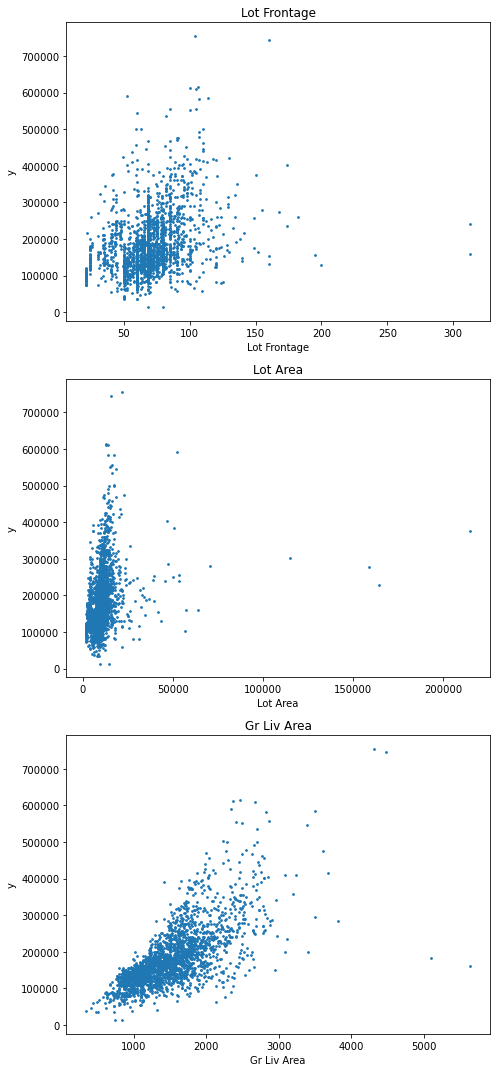

In [222]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (7, 15))
for feature, ax in zip(raw[['Lot Frontage','Lot Area', 'Gr Liv Area']], axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

By visual inspection we see 4 extreme outliers (mentioned in the accompamying documentation.txt by the author). Two of them have a Sale Price that likely does not represent actual market values and two of them are simply unusual sales (very large houses priced relatively appropriately). I will remove them from the dataset.

I check for __multi-feature outliers__ with respect to two features which hold information about the the Lot of the houses, namely 'Lot Area' and 'Lot Frontage'.

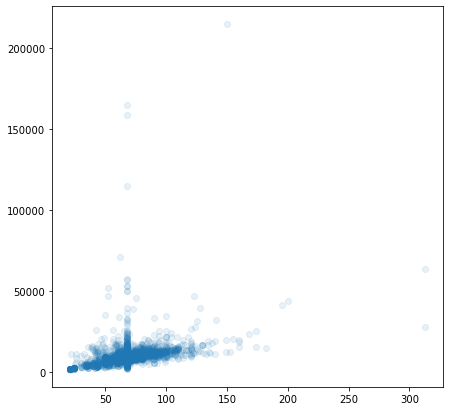

In [223]:
fig, axes = plt.subplots(figsize = (7,7))
plt.scatter(raw['Lot Frontage'],raw['Lot Area'], alpha = 0.1)

I observe that the extreme outliers are for both features extreme values, an observation that  strengthens the argument towards removing them.

I will remove the follwing extreme outliers by hand (as seen by observing the graphs in serveral features). By extreme outliers I mean the values that do not follow the distribution of the data. Having said that, they can lead to wrong coefficients during the learning phase (training).

In [224]:
e_outliers = raw.loc[(raw['Gr Liv Area'] > 4000) | 
                     (raw['Lot Frontage'] > 250) | 
                     (raw['Lot Area'] > 100000) | 
                     (raw['Mas Vnr Area'] > 1400) |
                     (raw['BsmtFin SF 1'] > 3000) |
                     (raw['BsmtFin SF 2'] > 1200) |
                     (raw['Total Bsmt SF'] > 3000) |
                     (raw['1st Flr SF'] > 3000) |
                     (raw['2nd Flr SF'] > 1500) |
                     (raw['Wood Deck SF'] > 1400) |
                     (raw['Enclosed Porch'] > 400)   , :]

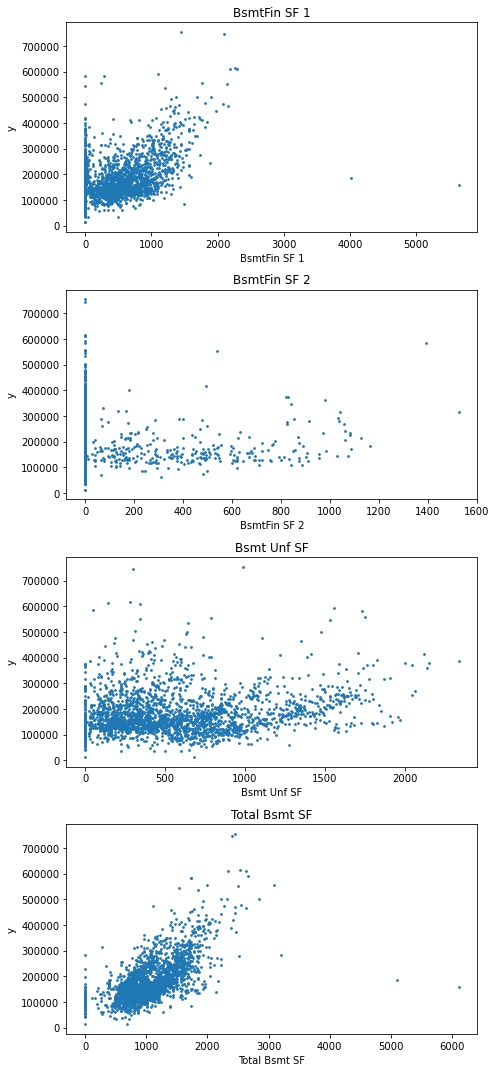

In [225]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (7, 15))
for feature, ax in zip(raw[[ 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',]], axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

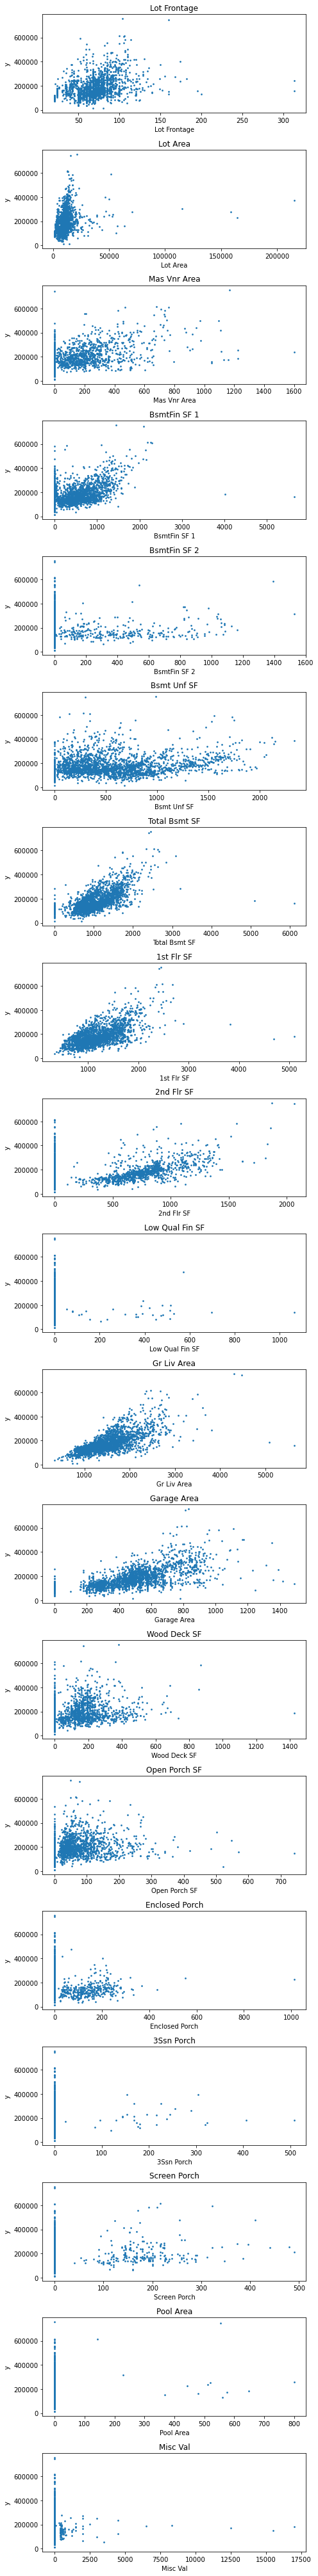

In [226]:
fig, axes = plt.subplots(nrows = 19, ncols = 1, figsize = (7, 56))
for feature, ax in zip(continuous, axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

I will now plot the discrete features of my dataset.

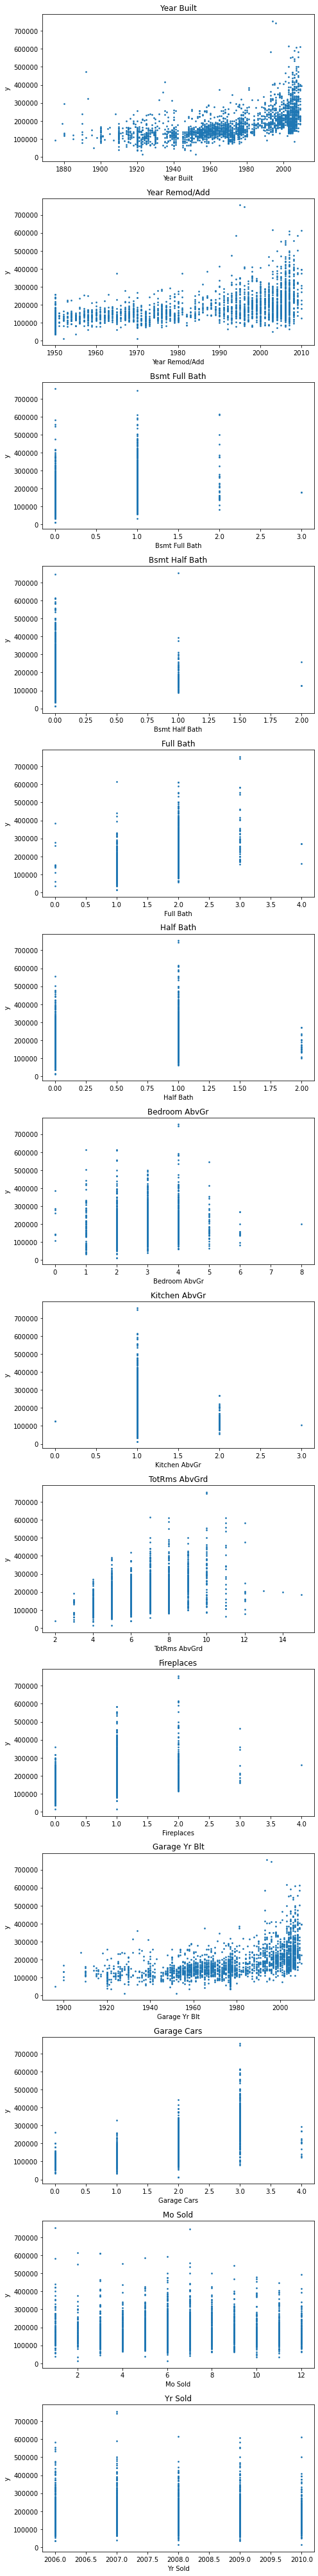

In [227]:
fig, axes = plt.subplots(nrows = 14, ncols = 1, figsize = (7, 56))
for feature, ax in zip(discrete, axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

Specifically for the 'Garage Yr Blt' feature, I will plot it independently removing the 0 values.

In [228]:
  gar = raw.loc[raw['Garage Yr Blt'] > 0, :]

In [229]:
gar.head()

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070          60        RL          68.0      8795   Pave   
1   2586  535305120          20        RL          75.0     10170   Pave   
2   2289  923228250         160        RM          21.0      2001   Pave   
3    142  535152150          20        RL          70.0     10552   Pave   
4   2042  903475060         190        RM          60.0     10120   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  \
0        Norm        Norm      1Fam      2Story            7            5   
1        Norm        Norm      1Fam      1Story            6            6   
2        Norm        Norm     Twnhs      2Story            4            5   
3        Norm        Norm      1Fam      1Story            5            5   
4       Feedr        Norm    2fmCon      2.5Unf            7            4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          1              4   
1               0               0          1          1              2   
2               0               0          1          1              3   
3               0               1          1          1              4   
4            

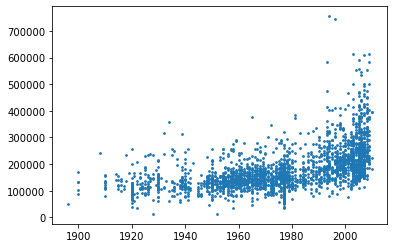

In [230]:
plt.scatter(gar['Garage Yr Blt'], gar.SalePrice, s=3)

In [231]:
e_outliers = raw.loc[(raw['Gr Liv Area'] > 4000) | 
                     (raw['Lot Frontage'] > 250) | 
                     (raw['Lot Area'] > 100000) | 
                     (raw['Mas Vnr Area'] > 1400) |
                     (raw['BsmtFin SF 1'] > 3000) |
                     (raw['BsmtFin SF 2'] > 1200) |
                     (raw['Total Bsmt SF'] > 3000) |
                     (raw['1st Flr SF'] > 3000) |
                     (raw['2nd Flr SF'] > 1500) |
                     (raw['Wood Deck SF'] > 1400) |
                     (raw['Enclosed Porch'] > 400)   , :]

In [232]:
len(discrete)

14

In [233]:
e_outliers

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
71     2181  908154195          20        RL         128.0     39290   Pave   
102    1761  528320050          60        RL         160.0     15623   Pave   
237    1768  528351010          60        RL         104.0     21535   Pave   
267    1571  916125425         190        RL          68.0    164660   Grvl   
283    2294  923229100          80        RL          68.0     15957   Pave   
306    2738  905427030          75        RL          60.0     19800   Pave   
522    1420  906204280          60        RL          68.0      9771   Pave   
602     445  528142130          20        RL          85.0     10655   Pave   
647    2667  902400110          75        RM          90.0     22950   Pave   
663     816  906230010          90        RL          68.0     11855   Pave   
838    2451  528360050          60        RL         114.0     17242   Pave   
1304   1266  535427070          20        RL         313.0     27650   Pave   
1315    501  528363050          20        RL          68.0     10750   Pave   
1500   1499  908154235          60        RL         313.0     63887   Pave   
1513   2116  906426060          50        RL          68.0    159000   Pave   
1582   2571  535150300          75        RL         174.0     25419   Pave   
1680    661  535381040          50        RL          60.0     10410   Pave   
1724   2331  527210040          60        RL          60.0     18062   Pave   
1960   1850  533241030          60        FV          66.0      7399   Pave   
2056   1498  908154080          20        RL         123.0     47007   Pave   
2092   1307  902207220          75        RM          87.0     18386   Pave   
2239   2090  906200230          50        RL         104.0     23920   Pave   
2257    957  916176125          20        RL         150.0    215245   Pave   
2316   2072  905301050          20        RL          68.0    115149   Pave   
2329    817  906230020          90        RL          68.0      7939   Pave   
2393    424  528106020          20        RL         105.0     15431   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
71         IR1          Bnk    AllPub     Inside        Gtl      Edwards   
102        IR1          Lvl    AllPub     Corner        Gtl      NoRidge   
237        IR1          Lvl    AllPub     Corner        Gtl      NoRidge   
267        IR1          HLS    AllPub     Corner        Sev       Timber   
283        IR1          Low    AllPub     Corner        Mod      Mitchel   
306        Reg          Lvl    AllPub     Inside        Gtl      Edwards   
522        IR3          Lvl    AllPub     Corner        Gtl      SawyerW   
602        IR1          Lvl    AllPub     Inside        Gtl      NridgHt   
647        IR2          Lvl    AllPub     Inside        Gtl      OldTown   
663        Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
838        IR1          Lvl    AllPub     Inside        Gtl      NoRidge   
1304       IR2          HLS    AllPub     Inside        Mod        NAmes   
1315       IR1          Lvl    AllPub    CulDSac        Gtl      NoRidge   
1500       IR3          Bnk    AllPub     Corner        Gtl      Edwards   
1513       IR2          Low    AllPub    CulDSac        Sev      ClearCr   
1582       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
1680       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1724       IR1          HLS    AllPub    CulDSac        Gtl      StoneBr   
1960       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
2056       IR1          Lvl    AllPub     Inside        Gtl      Edwards   
2092       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
2239       Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
2257       IR3          Low    AllPub     Inside        Sev       Timber   
2316       IR2          Low    AllPub    CulDSac

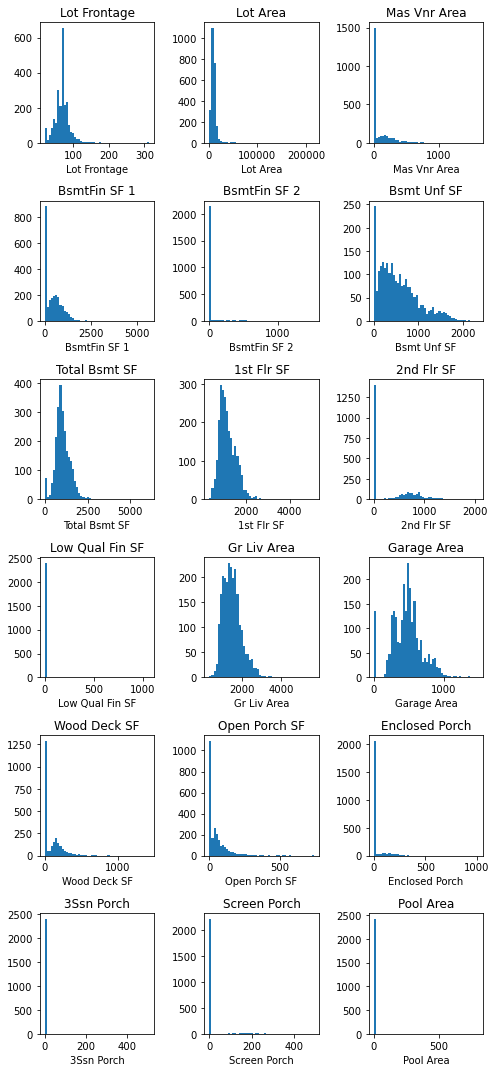

In [234]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (7, 15))
for feature, ax in zip(continuous, axes.ravel()):
    ax.hist(raw[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

# Notes
You can create an additional binary features like 'Garage_exists' that indicate whether a house has a garage or not, to keep along side the original one. You can then look at the subpopulation of houses that have a garage to determine outliers within that subpopulation only.
When you feed both the binary and the numeric feature to a linear regression the model will assign them a coefficient each. The coefficient for 'Garage_exists' can be interpreted as the additional value due to the existence of a garage, while the coefficient for 'Garage_Area' can be interpreted as the additional value per unit area. Thus this combination allows you more fine tuning.
You can also apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.



__Feature engineering__
Regarding polyfit(), You can use PolynomialFeatures to generate the necessary powers for selected features and then collate them with the other untreated features.

__sklearn__
The sklearn mae function does not support a constant value of the median. Therefore, you need to pass an array:

check SelectKBest

__distributions with a lot of zeros - correlation__
When you feed both the binary and the numeric feature to a linear regression the model will assign them a coefficient each. The coefficient for 'Garage_exists' can be interpreted as the additional value due to the existence of a garage, while the coefficient for 'Garage_Area' can be interpreted as the additional value per unit area. Thus this combination allows you more fine tuning.
You can also apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.
some variables have a peak of zero values which need to be filtered out before applying z-score.
You mean that they need to be filtered out ONLY for the calculation of the Z-score ?

Is keeping both the "boolean" and the "continuous" column (e.g. "Pool Size", "has_Pool") ok, bc. many of them really have a __high correlation__ (computed the corr-scores… e.g. pool would have corr=0.944… I am afraid, due to construction of the boolean column out of the continuous column, this automatically "happens"…), and all the input features ideally should rather be "independent" (not correlated)?
Yes for pool the correlation is quite high due to the very low number of non-zero values. For the other variables (garage, porch, …) correlation should not be too high.
From a theoretical perspective the above would not be ideal but as we have seen we can use regularization to deal with features that are nearly collinear.


In [235]:
len(e_outliers)

26

In [236]:
raw_filtered = raw.drop(e_outliers.index, axis = 0)

In [237]:
raw.shape

(2430, 78)

In [238]:
raw_filtered.shape

(2404, 78)

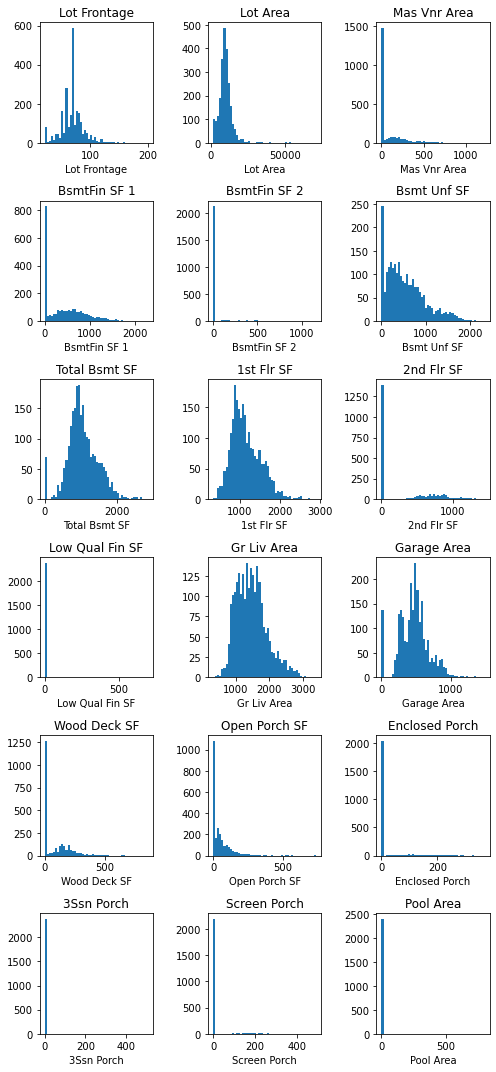

In [239]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (7, 15))
for feature, ax in zip(continuous, axes.ravel()):
    ax.hist(raw_filtered[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

I will check whether it makes sense to log-transform the target variable SalePrice.

Text(0.5, 0, 'SalePrice')

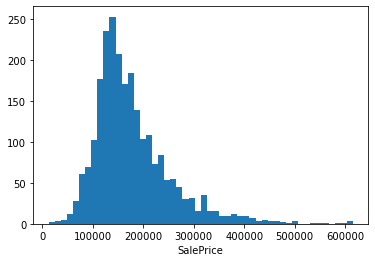

In [241]:
plt.hist(raw_filtered['SalePrice'], bins = 50)
plt.xlabel('SalePrice')

Text(0.5, 0, 'SalePrice')

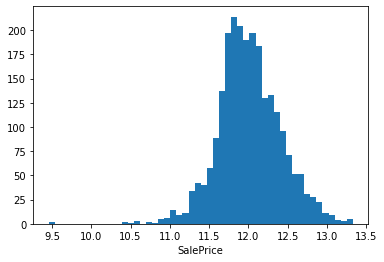

In [242]:
plt.hist(np.log(raw_filtered['SalePrice']), bins = 50)
plt.xlabel('SalePrice')

From the histograms it is obvious that it makes sense to apply the log transformation to the target variable because in this way we transform the distibution to a symmetrical one. That means that in our model we will not favour the expensive houses (bias) as is the case of a skewed distribution.

In [243]:
raw_filtered.head()

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070          60        RL          68.0      8795   Pave   
1   2586  535305120          20        RL          75.0     10170   Pave   
2   2289  923228250         160        RM          21.0      2001   Pave   
3    142  535152150          20        RL          70.0     10552   Pave   
4   2042  903475060         190        RM          60.0     10120   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  \
0        Norm        Norm      1Fam      2Story            7            5   
1        Norm        Norm      1Fam      1Story            6            6   
2        Norm        Norm     Twnhs      2Story            4            5   
3        Norm        Norm      1Fam      1Story            5            5   
4       Feedr        Norm    2fmCon      2.5Unf            7            4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          1              4   
1               0               0          1          1              2   
2               0               0          1          1              3   
3               0               1          1          1              4   
4            

In [244]:
df_numerical = raw_filtered._get_numeric_data()

In [245]:
f = pd.melt(raw_filtered, value_vars = raw_filtered[continuous])
f

variable  value
0      Lot Frontage   68.0
1      Lot Frontage   75.0
2      Lot Frontage   21.0
3      Lot Frontage   70.0
4      Lot Frontage   60.0
...             ...    ...
45671      Misc Val    0.0
45672      Misc Val    0.0
45673      Misc Val    0.0
45674      Misc Val    0.0
45675      Misc Val    0.0

[45676 rows x 2 columns]

In addition to the previous plots I will plot the kernel density estimation (with normalized histograms, suitably smoothed) for all the numerical features. The bandwidth (window width) of the kernel changes its shape.

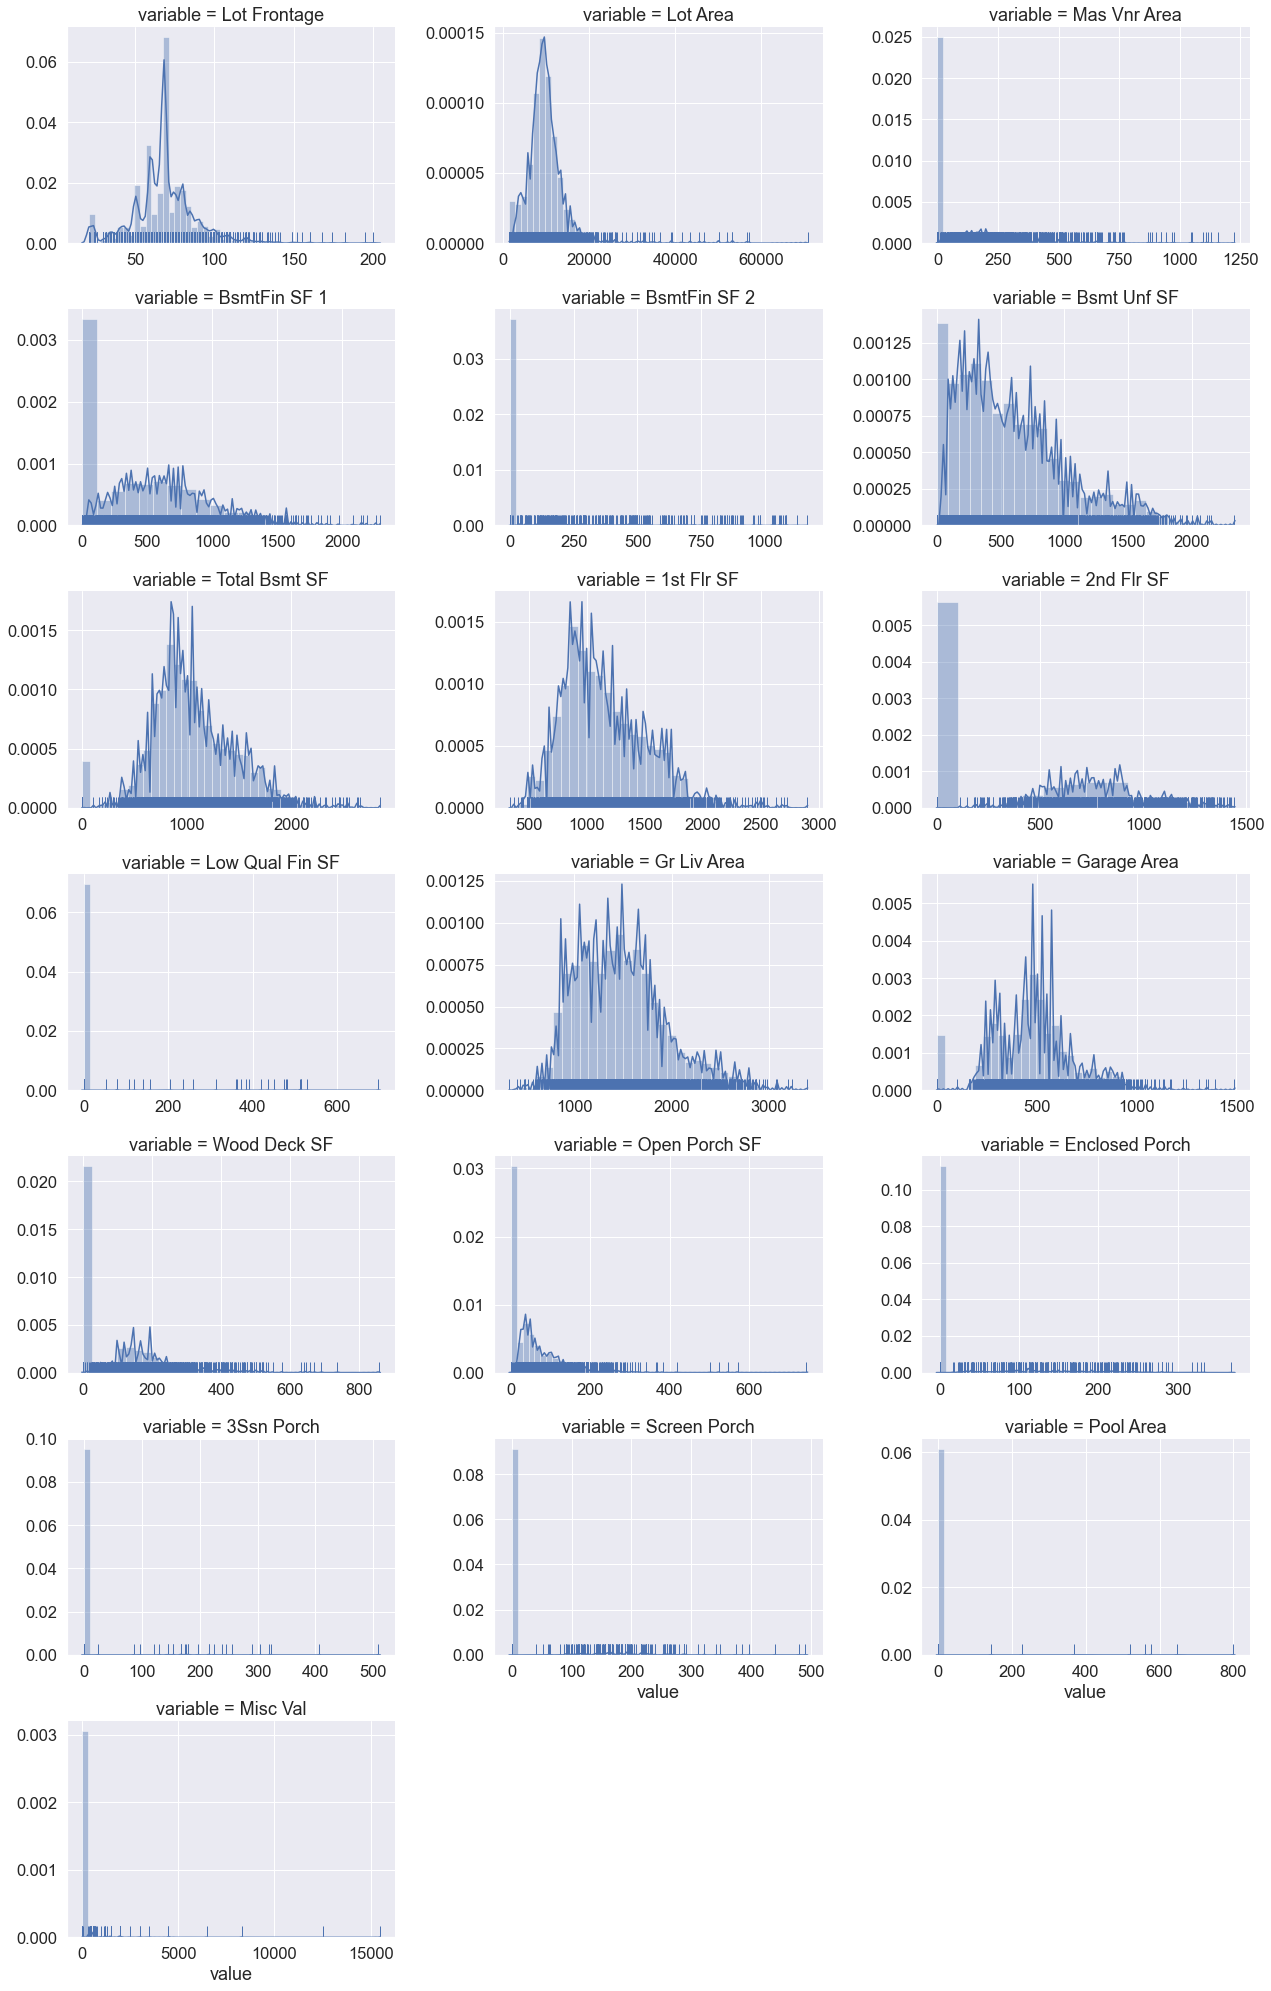

In [246]:
sns.set(font_scale=1.5) 
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex = False, sharey = False, height = 4, aspect = 1.5)
g = g.map(sns.distplot, 'value', hist = True, kde_kws = {'bw': 1.5}, rug = True)

# sns.distplot(x, fit=norm, kde=False)

Reference: https://towardsdatascience.com/creating-python-functions-for-exploratory-data-analysis-and-data-cleaning-2c462961bd71

I also observe that for some features (e.g. Pool Area) exhibit distributions with a lot of points being zero and the rest of the points exhibit some other distribution. this implies the coexistence of two different subpopulations: one with a Pool and the other without a Pool.

For these cases I will introduce a binary parameter (Pool_exists: Yes/No) that indicates whether the house has a pool or not. I will then look at the subpopulation of houses that have a Pool, examine the distribution of that polupation and flag outliers whithin this subpopulation.

As mentioned in the comments when we feed both the binary and the numeric feature to a linear regression, the model will assign them a coefficient each. The coefficient for 'Pool exists' can be interpreted as the additional value due to the existence of a pool, while the coefficient for 'Pool Area' can be interpreted as the additional value per unit area. Thus this combination allows you more fine tuning.

__Later:__
1. Test for normality
from the density functions and the normallized histograms of the above plots I observe that none of the distributions seem to follow the normal distribution or could be considered normal in the first place. __test for normality?__ Kurtosis

2. You can also apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.

For the features: 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', '2nd Flr SF','Wood Deck SF',
    'Open Porch SF', 'Enclosed Poch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
    'Garage Area'. 
    I will introduce the following boolean variables:

['Pool exists',
'Garage exists',
'Wood Desk exists',
'Mas Vnr exists',
'Oper Porch exists',
'Enclosed Porch exists',
'Screen Porch exists',
'Misc Val exists',
'3Ssn Porch exists',
'BsmtFin1 exists',
'BsmtFin2 exists',
'2nd Flr exists']


I will now create the binary (not boolean) features. The boolean features (bool() with values False/True) become binary casting the type 'int64'.

In [247]:
sub_pops = ['Pool Area', 'Garage Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', '2nd Flr SF','Wood Deck SF',
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',  'Misc Val']

In [248]:
# or alternatively:
# raw_filtered['Pool exists1']= [0 if x == 0 else 1 for x in raw_filtered['Pool Area']] 
raw_filtered['Pool exists'] = raw_filtered.apply(lambda row: bool(row['Pool Area'] > 0), axis = 1).astype('int64')
raw_filtered['Garage exists'] = raw_filtered.apply(lambda row: bool(row['Garage Area'] > 0), axis = 1).astype('int64')
raw_filtered['Wood Deck exists'] = raw_filtered.apply(lambda row: bool(row['Wood Deck SF'] > 0), axis = 1).astype('int64')
raw_filtered['Mas Vnr exists'] = raw_filtered.apply(lambda row: bool(row['Mas Vnr Area'] > 0), axis = 1).astype('int64')
raw_filtered['Open Porch exists'] = raw_filtered.apply(lambda row: bool(row['Open Porch SF'] > 0), axis = 1).astype('int64')
raw_filtered['Enclosed Porch exists'] = raw_filtered.apply(lambda row: bool(row['Enclosed Porch'] > 0), axis = 1).astype('int64')
raw_filtered['3Ssn Porch exists'] = raw_filtered.apply(lambda row: bool(row['3Ssn Porch'] > 0), axis = 1).astype('int64')
raw_filtered['Screen Porch exists'] = raw_filtered.apply(lambda row: bool(row['Screen Porch'] > 0), axis = 1).astype('int64')
raw_filtered['Misc Val exists'] = raw_filtered.apply(lambda row: bool(row['Misc Val'] > 0), axis = 1).astype('int64')
raw_filtered['BsmtFin1 exists'] = raw_filtered.apply(lambda row: bool(row['BsmtFin SF 1'] > 0), axis = 1).astype('int64')
raw_filtered['BsmtFin2 exists'] = raw_filtered.apply(lambda row: bool(row['BsmtFin SF 2'] > 0), axis = 1).astype('int64')
raw_filtered['2nd Flr exists'] = raw_filtered.apply(lambda row: bool(row['2nd Flr SF'] > 0), axis = 1).astype('int64')


In [249]:
raw_filtered.loc[raw_filtered['Pool Area']>0, :].head()

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
93    2358  527377030          20        RL          78.0     10140   Pave   
272   2231  909475230          20        RL          70.0     18044   Pave   
321   1064  528164060          20        RL         106.0     12720   Pave   
786   2351  527356020          60        RL          80.0     16692   Pave   
979   2279  923202220          20        RL         200.0     43500   Pave   

    Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
93        Reg          Lvl    AllPub     Inside        Gtl       NWAmes   
272       IR1          HLS    AllPub    CulDSac        Gtl      Crawfor   
321       Reg          HLS    AllPub     Inside        Mod      NridgHt   
786       IR1          Lvl    AllPub     Inside        Gtl       NWAmes   
979       Reg          Lvl    AllPub     Inside        Gtl      Mitchel   

    Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  \
93         Norm        Norm      1Fam      1Story            6            6   
272        Norm        Norm      1Fam      1Story            8            5   
321        Norm        Norm      1Fam      1Story           10            5   
786        RRAn        Norm      1Fam      2Story            7            5   
979      Artery        Norm      1Fam      1Story            3            5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
93         1974            1999        Hip   CompShg      HdBoard   
272        1986            1986      Gable   CompShg      WdShing   
321        2003            2003        Hip   CompShg      MetalSd   
786        1978            1978      Gable   CompShg      Plywood   
979        1953            1953      Gable   CompShg      MetalSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
93       HdBoard      BrkFace          99.0         TA         TA     CBlock   
272      Plywood         None           0.0         Gd         TA     CBlock   
321      MetalSd        Stone         680.0         Ex         TA      PConc   
786      Plywood      BrkFace         184.0         TA         TA     CBlock   
979      MetalSd         None           0.0         TA         TA     CBlock   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
93         TA        TA            No            ALQ         663.0   
272        Gd        TA            No            Unf           0.0   
321        Ex        TA            Gd            GLQ        2257.0   
786        Gd        TA            No            BLQ         790.0   
979        NA        NA            NA             NA           0.0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
93             LwQ         377.0          0.0         1040.0    GasA   
272            Unf           0.0        279.0          279.0    GasA   
321            Unf           0.0        278.0         2535.0    GasA   
786            LwQ         469.0        133.0         1392.0    GasA   
979             NA           0.0          0.0            0.0    GasA   

    Heating QC  ... Full Bath Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
93          Fa  ...         1         1              3              1   
272         Gd  ...         2         1              2              1   
321         Ex  ...         1         1              1              1   
786         TA  ...         3         1              5              1   
979         Ex  ...         1         0              2              1   

     Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  \
93             Gd              5         Typ           1            Fa   
272            Gd              6         Typ           1            Gd   
321            Ex              7         Typ           2            Gd   
786            Gd             12         Typ           2            TA   
979            TA              9        Min1       

### Question: Is there a more elegant way of doing that?

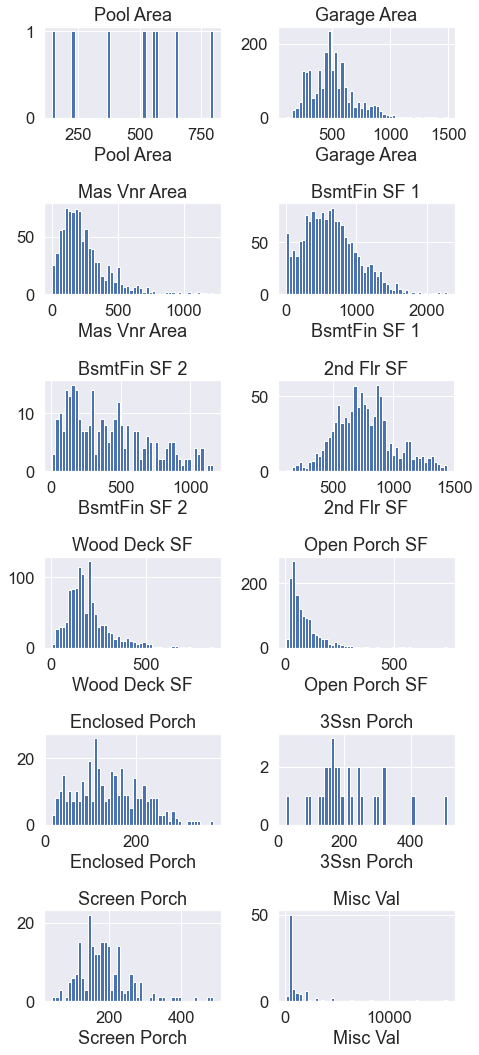

In [250]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (7, 15))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.hist(subpop[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

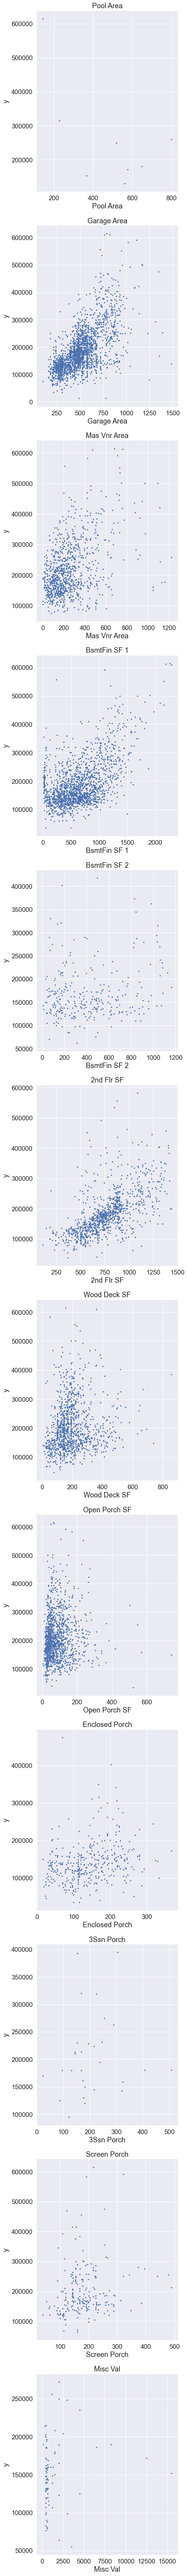

In [251]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize = (7, 92))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.scatter(subpop[feature], subpop.SalePrice, s = 5)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

For some features e.g. 'Pool Area', 'Misc Val', '3Ssn Porch' etc. the non-zero data points are not enough to form a clear distribution so I cannot make a statement whether they follow the mainstream distribution or they deviate significantly from it. So at this point I will not remove further outliers from these features. I could only flag the following points as outliers:

In [252]:
s_outliers = raw_filtered.loc[(raw_filtered['Wood Deck SF'] > 800) | 
                              (raw_filtered['Open Porch SF'] > 450), :]

In [253]:
s_outliers

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
467    1289  902105020          50        RM          60.0     10440   Pave   
842    2523  533350050          20        RL          68.0     50271   Pave   
977     727  902477120          30   C (all)          60.0      7879   Pave   
1223   2066  905225020          60        RL          99.0     16779   Pave   
1672   1321  902401120          75        RM          75.0     13500   Pave   
2117   2196  909176170          90        RL          60.0     10890   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
467        Reg          Lvl    AllPub     Corner        Gtl      OldTown   
842        IR1          Low    AllPub     Inside        Gtl      Veenker   
977        Reg          Lvl    AllPub     Inside        Gtl       IDOTRR   
1223       Reg          Lvl    AllPub     Inside        Gtl       Sawyer   
1672       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
2117       Reg          Lvl    AllPub     Inside        Gtl        SWISU   

     Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  \
467         Norm        Norm      1Fam      1.5Fin            6            7   
842         Norm        Norm      1Fam      1Story            9            5   
977         Norm        Norm      1Fam      1Story            4            5   
1223       Feedr        Norm      1Fam      2Story            5            4   
1672      Artery        PosA      1Fam      2.5Unf           10            9   
2117        Norm        Norm    Duplex      2Story            5            6   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
467         1920            1950      Gable   CompShg      BrkFace   
842         1981            1987      Gable   WdShngl      WdShing   
977         1920            1950      Gable   CompShg      Wd Sdng   
1223        1920            1996      Gable   CompShg      Wd Sdng   
1672        1893            2000      Gable   CompShg      Wd Sdng   
2117        1923            1950        Hip   CompShg      Wd Sdng   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
467       Wd Sdng         None           0.0         Gd         Gd     BrkTil   
842       Wd Shng         None           0.0         Gd         TA     CBlock   
977       Wd Sdng         None           0.0         TA         TA     CBlock   
1223      Wd Sdng      BrkFace         356.0         TA         Fa     CBlock   
1672      Wd Sdng         None           0.0         Ex         Ex     BrkTil   
2117      Plywood         None           0.0         TA         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
467         Gd        TA            No            LwQ         493.0   
842         Ex        TA            Gd            GLQ        1810.0   
977         TA        TA            No            Rec         495.0   
1223        Gd        TA            No            BLQ         267.0   
1672        TA        TA            No            Unf           0.0   
2117        TA        TA            Mn            Rec         371.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
467             Unf           0.0       1017.0         1510.0    GasW   
842             Unf           0.0         32.0         1842.0    GasA   
977             Unf           0.0        225.0          720.0    GasA   
1223            Unf           0.0        404.0          671.0    GasA   
1672            Unf           0.0       1237.0         1237.0    GasA   
2117            Unf           0.0        925.0         1296.0    Grav   

     Heating QC  ... Full Bath Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
467          Ex  ...         2         0              5              1   
842          Gd  ...         0         1              0              1   
977          TA  ...         1         0              2            

In [254]:
raw_filtered = raw_filtered.drop(s_outliers.index, axis = 0)

Another way of looking at these features is to apply log1p transformation first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.

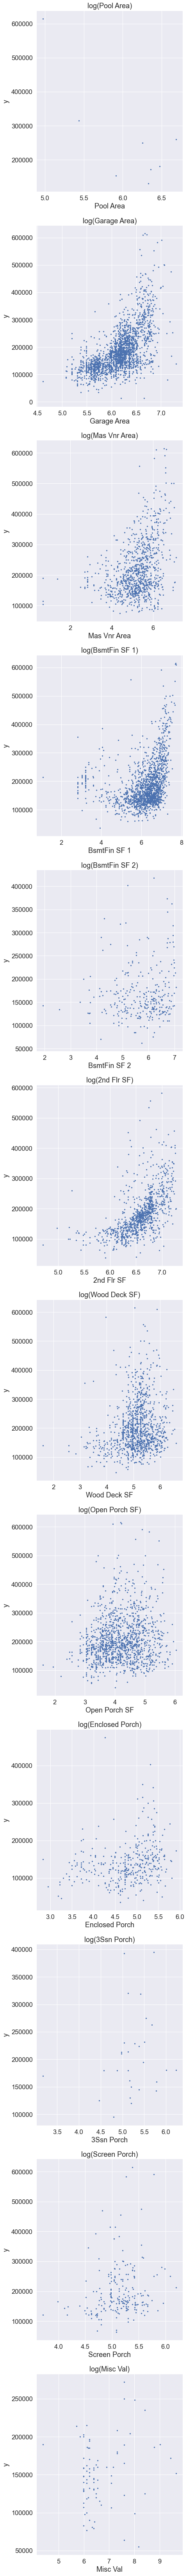

In [255]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize = (7, 92))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.scatter(np.log1p(subpop[feature]), subpop.SalePrice, s = 5)
    ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

Notes on the features:
 -  features candidates for a log1p transformation are features with skewed distributions: 
 the features with two polulationsm basically all the continuous features
    
 - features candidates for a polynomial transformation: 'Garage Yr Blt', 'Year Blt', 'Bsmt Unf SF'
    
 - features with very few data: 'Pool Area', 'BsmtFin 1', 'BsmtFin SF 2', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'
 - features candidates for no transformation (linear relationship): the rest   

### 5| Tests for normality 
Not needed at this point. It is obvious by visual inspection that the distributions are not normal.

sns.distplot(...,fit = normal)

### 6| Correlation study

For the numerical (continuous or discrete) features:

In [256]:
raw_filtered.corr()

Order       PID  Lot Frontage  Lot Area  Year Built  \
Order                  1.000000  0.178507     -0.018231  0.041683   -0.045582   
PID                    0.178507  1.000000     -0.098756  0.013351   -0.333359   
Lot Frontage          -0.018231 -0.098756      1.000000  0.461801    0.134959   
Lot Area               0.041683  0.013351      0.461801  1.000000    0.045505   
Year Built            -0.045582 -0.333359      0.134959  0.045505    1.000000   
Year Remod/Add        -0.065798 -0.147036      0.082062  0.016624    0.610096   
Mas Vnr Area          -0.053922 -0.239359      0.195880  0.137984    0.321022   
BsmtFin SF 1          -0.032044 -0.111591      0.143578  0.170074    0.290384   
BsmtFin SF 2           0.006162 -0.001026      0.025157  0.068189   -0.030899   
Bsmt Unf SF           -0.007271 -0.079434      0.123898  0.059988    0.127180   
Total Bsmt SF         -0.038569 -0.200031      0.289632  0.267425    0.423738   
1st Flr SF            -0.026837 -0.155889      0.392218  0.384785    0.328637   
2nd Flr SF            -0.004841 -0.008454      0.000807  0.019933    0.016827   
Low Qual Fin SF        0.009676  0.082023     -0.003895 -0.013177   -0.126037   
Gr Liv Area           -0.025109 -0.126116      0.316699  0.326908    0.269059   
Bsmt Full Bath        -0.034619 -0.034282      0.071612  0.104044    0.214025   
Bsmt Half Bath         0.015980 -0.007267     -0.035671 -0.001370   -0.038461   
Full Bath             -0.052854 -0.182350      0.159062  0.129943    0.487804   
Half Bath             -0.042275 -0.174674      0.042821  0.061218    0.273677   
Bedroom AbvGr          0.011495 -0.003503      0.220391  0.186551   -0.057087   
Kitchen AbvGr         -0.020150  0.085032      0.017014 -0.010750   -0.154906   
TotRms AbvGrd         -0.006003 -0.077501      0.309795  0.272726    0.116625   
Fireplaces            -0.012187 -0.132472      0.209188  0.294416    0.191915   
Garage Yr Blt         -0.059102 -0.251547      0.090298  0.005318    0.807863   
Garage Cars           -0.039588 -0.242439      0.313242  0.250004    0.549959   
Garage Area           -0.047398 -0.212654      0.336532  0.277477    0.494060   
Wood Deck SF          -0.046398 -0.074588      0.117063  0.162587    0.223415   
Open Porch SF          0.010986 -0.085509      0.138217  0.121473    0.228103   
Enclosed Porch         0.003332  0.163522     -0.004844  0.014033   -0.391462   
3Ssn Porch            -0.012016 -0.021156      0.038345  0.035608    0.023026   
Screen Porch           0.006261 -0.029283      0.071982  0.097060   -0.031801   
Pool Area              0.043647 -0.013135      0.085810  0.077000    0.000788   
Misc Val              -0.014344 -0.029080      0.011113  0.040731   -0.024920   
Mo Sold                0.148736 -0.050140      0.004648 -0.018216    0.032870   
Yr Sold               -0.976022  0.003634      0.003094 -0.037275   -0.017504   
SalePrice             -0.045066 -0.250005      0.346708  0.315609    0.590952   
Pool exists            0.038968 -0.012118      0.086013  0.079442    0.006704   
Garage exists         -0.010665 -0.142192      0.104361  0.097085    0.212863   
Wood Deck exists      -0.034408 -0.075196      0.067328  0.085775    0.311042   
Mas Vnr exists        -0.052302 -0.238373      0.164153  0.083908    0.403464   
Open Porch exists     -0.007992 -0.172421      0.116017  0.080536    0.424171   
Enclosed Porch exists  0.010717  0.200230     -0.049833 -0.017809   -0.475372   
3Ssn Porch exists      0.001774 -0.007682      0.019741  0.024744    0.022119   
Screen Porch exists    0.008067 -0.007875      0.067459  0.083867   -0.047930   
Misc Val exists       -0.024923 -0.020451      0.024749  0.048029   -0.060538   
BsmtFin1 exists       -0.028100 -0.085349      0.016964  0.045428    0.174322   
BsmtFin2 exists       -0.013517 -0.032643      0.012067  0.049421   -0.049487   
2nd Flr exists        -0.005862  0.052999     -0.105056 -0.063180   -0.111458   

                       Year Remod/Add  Mas Vnr Area  Bsm

In [257]:
raw_filtered.corr()[['SalePrice']].sort_values(by = 'SalePrice')

SalePrice
PID                    -0.250005
Enclosed Porch exists  -0.213954
Enclosed Porch         -0.153968
Kitchen AbvGr          -0.126919
Misc Val exists        -0.067811
Low Qual Fin SF        -0.055911
BsmtFin2 exists        -0.053429
Order                  -0.045066
Bsmt Half Bath         -0.041384
Misc Val               -0.020980
BsmtFin SF 2           -0.017693
Yr Sold                -0.016224
Pool Area               0.028617
Mo Sold                 0.037553
3Ssn Porch exists       0.041816
3Ssn Porch              0.043454
Pool exists             0.061535
2nd Flr exists          0.065098
Screen Porch exists     0.091247
Screen Porch            0.104406
Bedroom AbvGr           0.116417
BsmtFin1 exists         0.181960
Bsmt Unf SF             0.183560
2nd Flr SF              0.211463
Garage exists           0.231498
Half Bath               0.278232
Bsmt Full Bath          0.286737
Wood Deck SF            0.311323
Wood Deck exists        0.314570
Lot Area                0.315609
Open Porch SF           0.336854
Lot Frontage            0.346708
Mas Vnr exists          0.415268
Open Porch exists       0.427603
BsmtFin SF 1            0.460916
TotRms AbvGrd           0.478732
Fireplaces              0.485128
Mas Vnr Area            0.520200
Full Bath               0.533058
Garage Yr Blt           0.537321
Year Remod/Add          0.543606
Year Built              0.590952
Garage Area             0.637633
1st Flr SF              0.647914
Garage Cars             0.649442
Total Bsmt SF           0.665906
Gr Liv Area             0.705744
SalePrice               1.000000

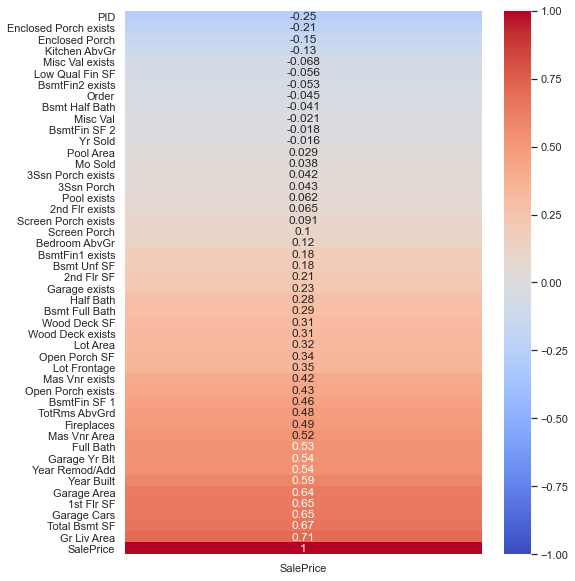

In [258]:
sns.set(font_scale=1)
plt.figure(figsize = (8, 10))
g = sns.heatmap(raw_filtered.corr()[['SalePrice']].sort_values(by = 'SalePrice'),
               annot = True,
               cmap = 'coolwarm',
               vmin = -1,
               vmax = 1,        
               )

We see from the heatmaps that the features 'Total Bsmt SF' and 'Gr Liv Area' are not very highly correlated and contribute they contribute more to the target variable 'SalePrice'.

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


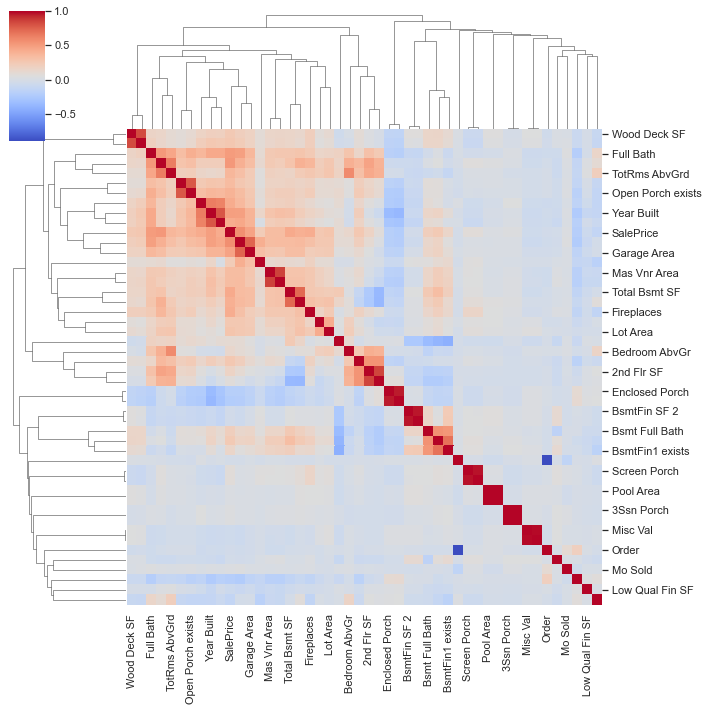

In [259]:
sns.clustermap(raw_filtered.corr(method = 'kendall'),square=True, cmap = 'coolwarm');

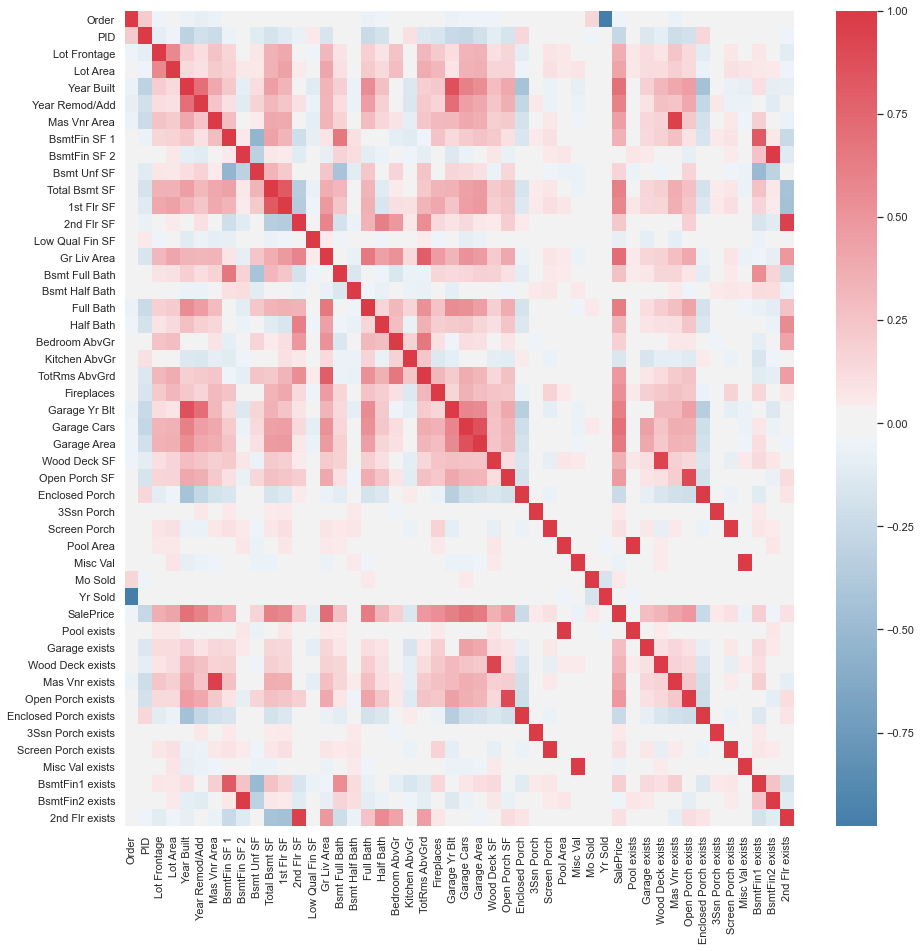

In [260]:
fig, ax = plt.subplots( nrows = 1 , ncols = 1,  figsize=(15, 15))
ax = sns.heatmap(raw_filtered.corr(method = 'spearman'), annot =False, 
                 cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False)
# sns.heatmap(df.corr(), annot =True, cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False, ax = ax)

There are some feature which are colinear and can cause ill-conditioning. these Features mainly correspond to the binary features we introduced to deal with the missing values with respect to some features while not droping the whole raws and losing the rest of the information. Some other features like 'Garage Cars' and 'Garage Area' could be considered nearly colinear. Ill conditioning can cause numerical instability will be handled with regularization. therefore I will chose Ridge regressing for the modeling.

### Violin plots for categorical data

In [261]:
len(nominal)

21

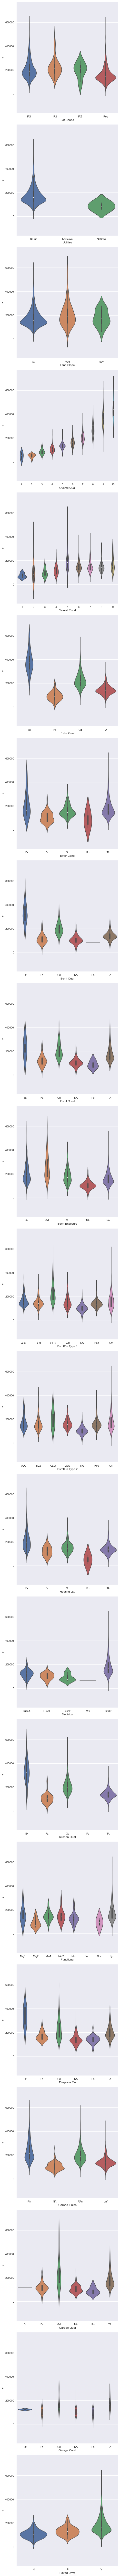

In [262]:
fig, axes = plt.subplots(nrows = 21, ncols = 1, figsize = (7, 147), sharey = True)
for feature, ax in zip(ordinal, axes.ravel()):
   # sns.catplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered)
    sns.violinplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered, ax = ax)
   # sns.violinplot(x = "species", y = iris['petal_length'], data = irise = 'pastel', palette = my_palette[0], ax = axes[0])
   # ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

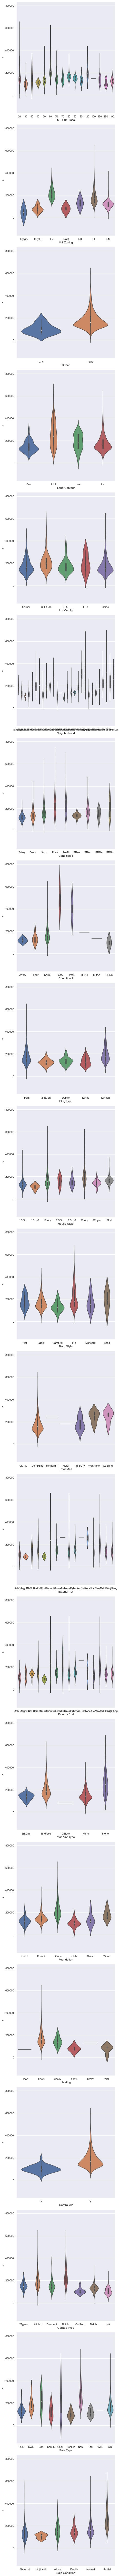

In [263]:
fig, axes = plt.subplots(nrows = 21, ncols = 1, figsize = (7, 147), sharey = True)
for feature, ax in zip(nominal, axes.ravel()):
   # sns.catplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered)
    sns.violinplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered, ax = ax)
   # sns.violinplot(x = "species", y = iris['petal_length'], data = irise = 'pastel', palette = my_palette[0], ax = axes[0])
   # ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

There are  some feature which are colinear and can cause ill-conditioning. these Features mainly correspond to the binary features we introduced to deal with the missing values with respect to some features while not droping the whole raws and losing the rest of the information. Some other features like 'Garage Cars' and 'Garage Area' could be considered nearly colinear. Ill conditioning can cause numerical instability will be handled with __regularization__. therefore I will chose Ridge regressing for the modeling.

### Model Split:
At this point I will split my model in two parts, 80% for the train set and 20% for the validation part. The test part is already excluded and kept aside simulating unseen data.

In [264]:
cols = raw_filtered.drop('SalePrice', axis = 1).columns

In [265]:
# feature table and target variable

X = raw_filtered.drop('SalePrice', axis = 1).values
y = raw_filtered.SalePrice

In [266]:
k = pd.DataFrame(X)
k.columns = cols

In [267]:
k.head()

Order        PID MS SubClass MS Zoning Lot Frontage Lot Area Street  \
0   484  528275070          60        RL           68     8795   Pave   
1  2586  535305120          20        RL           75    10170   Pave   
2  2289  923228250         160        RM           21     2001   Pave   
3   142  535152150          20        RL           70    10552   Pave   
4  2042  903475060         190        RM           60    10120   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  \
0        Norm        Norm      1Fam      2Story            7            5   
1        Norm        Norm      1Fam      1Story            6            6   
2        Norm        Norm     Twnhs      2Story            4            5   
3        Norm        Norm      1Fam      1Story            5            5   
4       Feedr        Norm    2fmCon      2.5Unf            7            4   

  Year Built Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0       2000           2000      Gable   CompShg      VinylSd      VinylSd   
1       1951           1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2       1970           1970      Gable   CompShg      CemntBd      CmentBd   
3       1959           1959        Hip   CompShg      BrkFace      BrkFace   
4       1910           1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None            0         Gd         TA      PConc        Gd   
1      BrkFace          522         TA         TA     CBlock        TA   
2      BrkFace           80         TA         TA     CBlock        TA   
3         None            0         TA         TA     CBlock        TA   
4         None            0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ          300            Unf   
1        TA            No            Unf            0            Unf   
2        TA            No            Unf            0            Unf   
3        TA            No            Rec         1018            Unf   
4        TA            No            Unf            0            Unf   

  BsmtFin SF 2 Bsmt Unf SF Total Bsmt SF Heating Heating QC  ...  \
0            0         652           952    GasA         Ex  ...   
1            0         216           216    GasA         TA  ...   
2            0         546           546    GasA         Fa  ...   
3            0         380          1398    GasA         Gd  ...   
4            0         925           925    GasA         TA  ...   

  Bsmt Half Bath Full Bath Half Bath Bedroom AbvGr Kitchen AbvGr Kitchen Qual  \
0              0         2         1             4             1           Gd   
1              0         1         1             2             1           Gd   
2              0         1         1             3             1           TA   
3              1         1         1             4             1           Gd   
4              0         1         1             4             2           TA   

  TotRms AbvGrd Functional Fireplaces Fireplace Qu Garage Type Garage Yr Blt  \
0             8        Typ          1           TA     BuiltIn          2000   
1             5        Typ          1           Gd      Attchd          1951   
2             6        Typ          0           NA      Attchd          1970   
3             6        Typ          1           Gd      Attchd          1959   
4             9   

In [268]:
raw_filtered.head()

Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070          60        RL          68.0      8795   Pave   
1   2586  535305120          20        RL          75.0     10170   Pave   
2   2289  923228250         160        RM          21.0      2001   Pave   
3    142  535152150          20        RL          70.0     10552   Pave   
4   2042  903475060         190        RM          60.0     10120   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style Overall Qual Overall Cond  \
0        Norm        Norm      1Fam      2Story            7            5   
1        Norm        Norm      1Fam      1Story            6            6   
2        Norm        Norm     Twnhs      2Story            4            5   
3        Norm        Norm      1Fam      1Story            5            5   
4       Feedr        Norm    2fmCon      2.5Unf            7            4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  ... Full Bath  \
0           0.0        652.0          952.0    GasA         Ex  ...         2   
1           0.0        216.0          216.0    GasA         TA  ...         1   
2           0.0        546.0          546.0    GasA         Fa  ...         1   
3           0.0        380.0         1398.0    GasA         Gd  ...         1   
4           0.0        925.0          925.0    GasA         TA  ...         1   

  Half Bath  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  \
0         1              4              1            Gd              8   
1         1              2              1            Gd              5   
2         1              3              1            TA              6   
3         1              4              1            Gd              6   
4         1              4              2            TA              9   

   Functional  Fireplaces  Fireplace Qu  Garage Type  Garage Yr Blt  \
0         Typ           1            TA      BuiltIn           2000   
1         Typ           1            Gd       Attchd           1951   
2         Typ           0            NA       Attchd           1970   
3         Typ           1            Gd       Attchd     

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures

# Split into train/test sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# Standardize features


# Model Fit: 
### A. Simple Model with two variables

__feature selection__
For my simple model I will choose the two following features: 'Gr Liv Area' and the 'Year Blt'.
'Gr Liv Area' is the feature that contributes more to the target variable (heatmap) and according to my intuition the 'Year Blt' is an important parameter for the price of a house i.e. a new houses tend to cost more.

__feature engineering__
it looks like the 'Yr Blt' follows a polymonial distribution so I will use a polynomial transformation for this feature.
The distribution of the feature 'Gr Liv Area' is skewed so I will use a logarithmic transformation for this feature.

__Model Selection__
Ridge regression to use Regularization.
For regularization scaling is needed.
(Possible limitation of the output to improve performance)

In [270]:
def preprocess_simple(df):
    # work on a copy
    df = df.copy()
    
    # feature selection (two variables)
    df = df.reindex(columns = ['Gr Liv Area', 'Year Built', 'SalePrice'])
    
    # missing values
    
    #np.nanmedian(raw['Year Built']) = 1973
    # np.nanmedian(raw['Gr Liv Area']) = 1440 in case the test set 
    # has missing values on the 'Gr Liv Area' or 'Year Built' features
    
    df['Year Built'] = df['Year Built'].fillna(1973)
    df['Gr Liv Area'] = df['Gr Liv Area'].fillna(1440)
    
    # duplicates
    df.drop_duplicates(keep = False, inplace = True)
    
    # feature engineering - log transformation for 'Gr Liv Area'
    df['Gr Liv Area'] = np.log1p(df['Gr Liv Area'])
    
    # feature engineering adding polynomial features for 'Year Blt'
    for d in [0.5, 2, 3]:
        name = '{}**{}'.format('Year Built', d)
        df[name] = df['Year Built']**d
        
    
    return df

In [271]:
prep_simple_df = preprocess_simple(raw_filtered)

In [272]:
prep_simple_df.head()

Gr Liv Area  Year Built  SalePrice  Year Built**0.5  Year Built**2  \
0     7.721792        2000     236000        44.721360        4000000   
1     7.362645        1951     155000        44.170126        3806401   
2     6.996681        1970      75000        44.384682        3880900   
3     7.438972        1959     165500        44.260592        3837681   
4     7.544332        1910     122000        43.703547        3648100   

   Year Built**3  
0     8000000000  
1     7426288351  
2     7645373000  
3     7518017079  
4     6967871000

In [273]:
X_simple = prep_simple_df.drop('SalePrice', axis = 1).values
y_simple = np.log10(prep_simple_df.SalePrice).values

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_simple, y_simple, train_size = 0.8, random_state = 0)

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

In [275]:
X_tr_rescaled.mean(axis = 0)

array([-3.85245713e-14, -1.81081807e-16, -2.34720944e-13, -1.71067059e-15,
       -7.20070595e-16])

In [276]:
X_tr_rescaled.std(axis = 0)

array([1., 1., 1., 1., 1.])

In [277]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

# Variable store the results of the grid search
gs_results = []

# Grid search
for alpha in np.logspace(-1, 10, num = 500):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    # Save model and its performance on train/validation sets
    gs_results.append({
        'model': ridge,
        'alpha': alpha,
        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
        'validation_mse': MSE(y_val, ridge.predict(X_val_rescaled)),
        'validation_mae': MAE(10**y_val, 10**ridge.predict(X_val_rescaled)),
    })

gs_results = pd.DataFrame(gs_results)
gs_results.sample(10)

model         alpha  train_mse     train_mae  \
186   Ridge(alpha=1259.506464258359)  1.259506e+03   0.010645  30880.733749   
103  Ridge(alpha=18.644085339704873)  1.864409e+01   0.008979  29117.921039   
122   Ridge(alpha=48.90787094139595)  4.890787e+01   0.008986  29093.908064   
80    Ridge(alpha=5.801323103833378)  5.801323e+00   0.008971  29118.604385   
238  Ridge(alpha=17639.772753140453)  1.763977e+04   0.022227  45404.829194   
439  Ridge(alpha=475723613.91878897)  4.757236e+08   0.030919  54608.685925   
72   Ridge(alpha=3.8652211626312636)  3.865221e+00   0.008966  29112.687325   
487   Ridge(alpha=5438397428.464812)  5.438397e+09   0.030919  54609.168478   
289  Ridge(alpha=234823.46005542763)  2.348235e+05   0.029907  53581.283948   
135    Ridge(alpha=94.6132375589077)  9.461324e+01   0.009004  29069.017156   

     validation_mse  validation_mae  
186        0.008462    29376.137133  
103        0.006992    26548.066437  
122        0.006995    26551.383693  
80         0.006981    26537.621787  
238        0.019809    44221.043056  
439        0.028529    54057.521167  
72         0.006973    26527.004051  
487        0.028529    54058.022608  
289        0.027512    52987.791383  
135        0.007003    26583.475817

In [278]:
gs_results.validation_mse.idxmin()

0

In [279]:
gs_results.loc[0]

model             Ridge(alpha=0.1)
alpha                          0.1
train_mse               0.00890207
train_mae                  28998.4
validation_mse          0.00682371
validation_mae               26377
Name: 0, dtype: object

In [280]:
gs_results.loc[gs_results.validation_mse.idxmin()]

model             Ridge(alpha=0.1)
alpha                          0.1
train_mse               0.00890207
train_mae                  28998.4
validation_mse          0.00682371
validation_mae               26377
Name: 0, dtype: object

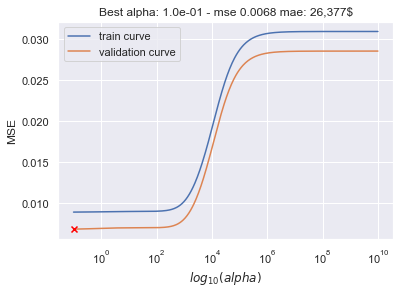

In [281]:
sns.set(font_scale=1) 
plt.semilogx(gs_results['alpha'], gs_results['train_mse'],label = 'train curve')
plt.semilogx(gs_results['alpha'], gs_results['validation_mse'], label = 'validation curve')

# mark the optimum value which minimizes the error of the validation set
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]


plt.scatter((best_result.alpha), best_result.validation_mse, marker = 'x', c='red', zorder = 10)
plt.title('Best alpha: {:.1e} - mse {:.4f} mae: {:,.0f}$'.format(best_result.alpha, best_result.validation_mse, best_result.validation_mae))

plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
#plt.xlim(300,200000)
plt.legend()
plt.show()


## Question-1:
In my work, Similarly, Validation Loss is less than Training Loss. This can be viewed in the previous graph.
Usually, we observe the opposite trend of mine. Is this type of trend represents good model performance? What can be reason for this unusual result?
Could it be, that your validation set consists of "easier" examples than the training set? oi is there something fundamentally wrong?


### Cross-Validation

I will try cross validation to see if the problem persitst.

In [282]:
scaler = StandardScaler()

In [284]:
# fit/test N models
gs_results = []
for run_idx in range(10):
    #Split into train/test sets
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, train_size =0.8, random_state = run_idx)
    
    X_tr_rescaled = scaler.fit(X_tr)
    X_tr_rescaled = scaler.transform(X_tr)
    X_val_rescaled = scaler.transform(X_val)
    
    #Grid search for the optimum alpha value
    for alpha in np.logspace(-10, 10, num = 20):
        ridge = Ridge(alpha = alpha)
        ridge.fit(X_tr, y_tr)
        
         # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'validation_mse': MSE(y_val, ridge.predict(X_val_rescaled)),
            'validation_mae': MAE(10**y_val, 10**ridge.predict(X_val_rescaled)),
        })
    
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_val = gb_alpha.validation_mse.mean()
std_tr = gb.alpha.train_mse.std()
std_val =gb.alpha.validation_mse.std()
alphas = mean_tr.index.values

# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, lablel = 'train')
plt.plot(np.log10(alphas), mean_val, label = 'validation')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha = 0.2)
plt.fill_between(np.log10(alphas), mean_val-std_val, mean_val+std_val, alpha = 0.2)


plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'RM'

## 2. Feature encoding

In [ ]:
We have defined before:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

In [ ]:
raw_filtered.Utilities.unique()

In [ ]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'phd':5}}])

In [ ]:
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes
obj_df.head()

In [ ]:
raw_filtered[ordinal].sample(10)

In [ ]:
raw_filtered['Lot Shape'].unique() 

In [ ]:
df = raw_filtered.copy()

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le_Lot_shape = LabelEncoder()
Lotshape = {'IR3': 0, 'IR2':1, 'IR1':2, 'Reg':3}
#df['Lot Shape'] = le_Lot_shape.fit_transform(df['Lot Shape'])
df['Lot Shape'] = df['Lot Shape'].replace(Lotshape)

In [ ]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'phd':5}}])